# Final_temp_NN_SMOTE

## Reproducible

In [ ]:
def repro():
  # Seed value
  # Apparently you may use different seed values at each stage
  seed_value= 42

  # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
  import os
  os.environ['PYTHONHASHSEED']=str(seed_value)

  # 2. Set the `python` built-in pseudo-random generator at a fixed value
  import random
  random.seed(seed_value)

  # 3. Set the `numpy` pseudo-random generator at a fixed value
  import numpy as np
  np.random.seed(seed_value)

  # 4. Set the `tensorflow` pseudo-random generator at a fixed value
  import tensorflow as tf
  tf.random.set_seed(seed_value)
  # for later versions: 
  # tf.compat.v1.set_random_seed(seed_value)

  # 5. Configure a new global `tensorflow` session
  from keras import backend as K
  # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
  # K.set_session(sess)
  # for later versions:
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
repro()
import tensorflow as tf

## Import Library

In [ ]:
!pip install bayesian-optimization

repro()
import pandas as pd                             #Read Dataset
import numpy as np
from sklearn.metrics import confusion_matrix    #Confussion Matrix
from sklearn import metrics                     #Evaluation Measurment
import matplotlib.pyplot as plt                 #Visualisasi
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential       
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
import math
import keras
import tensorflow.keras
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from IPython.display import display

## SMOTE

In [ ]:
sm = SMOTE(random_state=42)

## Import Dataset

,Dataset,Data,Feature
0,CM1,498,22
1,JM1,10880,22
2,MW1,253,38
3,KC1,2109,22
4,KC2,522,22
5,PC1,1109,22
6,PC2,745,37
7,PC3,1077,38
8,PC4,1458,38


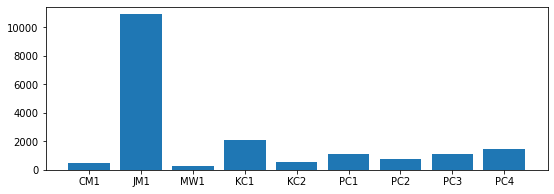

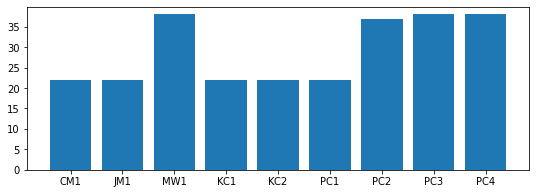

In [ ]:
repro()
scaler = MinMaxScaler()

#Import CM1 Dataset
data_cm1 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/CM1.csv')

#import + Preprocess JM1 Dataset
data_jm1 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/JM1.csv')
indexNames = data_jm1[ data_jm1['branchCount'] == '?' ].index
data_jm1.drop(indexNames , inplace=True)

#import MW1 Dataset
data_mw1 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/MW1.csv')

#import KC1 Dataset
data_kc1 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/KC1.csv')

#import KC2 Dataset ------------------
data_kc2 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/KC2.csv')

#import PC1 Dataset
data_pc1 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/PC1.csv')

#import PC2 Dataset -------------
data_pc2 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/PC2.csv')

#import PC3 Dataset ----------------
data_pc3 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/PC3.csv')

#import PC4 Dataset
data_pc4 = pd.read_csv('/content/drive/My Drive/Nasa_Dataset/clean/PC4.csv')


#Visualisasi Jumlah Data
names = ['CM1', 'JM1', 'MW1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC3', 'PC4']
values_data = [data_cm1.shape[0], data_jm1.shape[0], data_mw1.shape[0],data_kc1.shape[0],data_kc2.shape[0],
          data_pc1.shape[0],data_pc2.shape[0],data_pc3.shape[0],data_pc4.shape[0]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_data)

#Visualisasi Jumlah Fitur
values_feature = [data_cm1.shape[1], data_jm1.shape[1], data_mw1.shape[1],data_kc1.shape[1],data_kc2.shape[1],
          data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_feature)

# data_pc4.iloc[:, data_pc4.columns != 'c'] = scaler.fit_transform(data_pc4.iloc[:, data_pc4.columns != 'c'])
# data_pc3.iloc[:, data_pc3.columns != 'Defective'] = scaler.fit_transform(data_pc3.iloc[:, data_pc3.columns != 'Defective'])

Dataset = {'Dataset': ['CM1', 'JM1', 'MW1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC3', 'PC4'],
           'Data': [data_cm1.shape[0], data_jm1.shape[0], data_mw1.shape[0],data_kc1.shape[0],data_kc2.shape[0],
                    data_pc1.shape[0],data_pc2.shape[0],data_pc3.shape[0],data_pc4.shape[0]],
           'Feature': [data_cm1.shape[1], data_jm1.shape[1], data_mw1.shape[1],data_kc1.shape[1],data_kc2.shape[1],
                       data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
        }

df = pd.DataFrame(Dataset, columns = ['Dataset', 'Data','Feature'])
df

## Defective Module Rate

In [ ]:
def dmr(data, column):
  unique, counts = np.unique(data[[column]], return_counts=True)
  dmr = (round((counts[1]/(counts[0]+counts[1])*100),2))
  return dmr, unique, counts

print("DMR JM1: ",dmr(data_jm1, 'defects'))
print("DMR KC1: ",dmr(data_kc1, 'class'))
print("DMR KC2: ",dmr(data_kc2, 'class'))
print("DMR PC1: ",dmr(data_pc1, 'class'))
print("DMR PC2: ",dmr(data_pc2, 'Defective'))
print("DMR PC3: ",dmr(data_pc3, 'Defective'))
print("DMR PC4: ",dmr(data_pc4, 'c'))

DMR JM1:  (19.33, array([False,  True]), array([8777, 2103]))
DMR KC1:  (15.46, array([False,  True]), array([1783,  326]))
DMR KC2:  (20.5, array([False,  True]), array([415, 107]))
DMR PC1:  (6.94, array([False,  True]), array([1032,   77]))
DMR PC2:  (2.15, array([False,  True]), array([729,  16]))
DMR PC3:  (12.44, array([False,  True]), array([943, 134]))
DMR PC4:  (12.21, array([False,  True]), array([1280,  178]))


## Min Max Scaler

In [ ]:
repro()
scaler = MinMaxScaler()

data_cm1.iloc[:, data_cm1.columns != 'class'] = scaler.fit_transform(data_cm1.iloc[:, data_cm1.columns != 'class'])
data_jm1.iloc[:, data_jm1.columns != 'defects'] = scaler.fit_transform(data_jm1.iloc[:, data_jm1.columns != 'defects'])
data_kc1.iloc[:, data_kc1.columns != 'class'] = scaler.fit_transform(data_kc1.iloc[:, data_kc1.columns != 'class'])
data_kc2.iloc[:, data_kc2.columns != 'class'] = scaler.fit_transform(data_kc2.iloc[:, data_kc2.columns != 'class'])
data_pc1.iloc[:, data_pc1.columns != 'class'] = scaler.fit_transform(data_pc1.iloc[:, data_pc1.columns != 'class'])
data_pc2.iloc[:, data_pc2.columns != 'Defective'] = scaler.fit_transform(data_pc2.iloc[:, data_pc2.columns != 'Defective'])
data_pc3.iloc[:, data_pc3.columns != 'Defective'] = scaler.fit_transform(data_pc3.iloc[:, data_pc3.columns != 'Defective'])
data_pc4.iloc[:, data_pc4.columns != 'c'] = scaler.fit_transform(data_pc4.iloc[:, data_pc4.columns != 'c'])

## Split Train dev

In [1]:
def split(data, fold):
    repro()
    features, labels = data
    kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    # return a generator for the train/test splits per fold
    def fold_generator():
        for train_indices, test_indices in kfold.split(features, labels):
            yield (features.iloc[train_indices], labels.iloc[train_indices]), (features.iloc[test_indices], labels.iloc[test_indices])
    return fold_generator

In [ ]:
def load_data(data, label_name):
    repro()
    features, labels = data, data.pop(label_name)
    return features, labels

## Load Data

In [ ]:
data_cm1_load = load_data(data = data_cm1, label_name='class')
data_jm1_load = load_data(data = data_jm1, label_name='defects')
data_kc1_load = load_data(data = data_kc1, label_name='class')
data_kc2_load = load_data(data = data_kc2, label_name='class')
data_pc1_load = load_data(data = data_pc1, label_name='class')
data_pc2_load = load_data(data = data_pc2, label_name='Defective')
data_pc3_load = load_data(data = data_pc3, label_name='Defective')
data_pc4_load = load_data(data = data_pc4, label_name='c')

In [ ]:

fold_generator = split(data_kc2_load, 10)
for remainder, test in fold_generator():
  train, dev = next(split(remainder, 10)())
  unique, counts = np.unique(test[1], return_counts=True)
  print(unique, counts)

[False  True] [42 11]
[False  True] [42 11]
[False  True] [42 10]
[False  True] [42 10]
[False  True] [42 10]
[False  True] [41 11]
[False  True] [41 11]
[False  True] [41 11]
[False  True] [41 11]
[False  True] [41 11]


## Feature Selection

[0.07009974 0.04928424 0.02865798 0.0452186  0.04550971 0.0444585
 0.03323237 0.04938203 0.0597432  0.03914935 0.0473679  0.04130202
 0.05407929 0.03928045 0.05816735 0.0213171  0.05842391 0.06648796
 0.05196434 0.06108252 0.03579142]


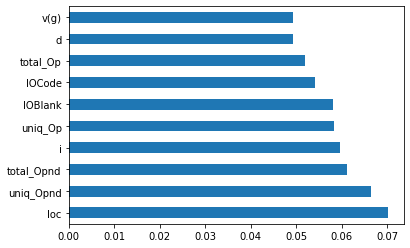

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(data_kc2_load[0],data_kc2_load[1])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_kc2_load[0].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
test = []
test.append(data_kc2_load[0][['lOBlank', 
                  'uniq_Opnd', 
                  'n', 
                  'loc',
                  'uniq_Op',
                  'd',
                  'total_Opnd',
                  'lOCode',
                  'total_Op',
                  'v']])
test.append(data_kc2_load[1])

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
          #  'regularizer': (1e-4, 1e-2),
           'drop': (0.1, 0.5),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (32, 100),
          #  'epoch' : (10,50),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=10, n_iter=50)
print(optimizer.max)

NameError: ignored

In [ ]:
print(optimizer.max)

{'target': 0.8671350736763386, 'params': {'drop': 0.14494819778173537, 'layer': 1.0325976297075958, 'lr': 0.009477826002873734, 'neighbors': 1.1553170377597592, 'neurons': 67.99758937088716, 'sampling': 0.9760733224454379}}


In [ ]:
result_neuralnet_pc4 = gridNeuralNet(test, 
                                len(test[0].columns), 
                                batch_size=64, 
                                sampling=0.9760733224454379, 
                                lr= 0.009477826002873734, 
                                neurons=67.99758937088716, 
                                drop= 0.14494819778173537,
                                layer=1.0325976297075958, 
                                neighbors = 1.1553170377597592,
                                epoch = 50,
                                fold = 7)
# print("dev")
# display(result_neuralnet_pc4[0])
# print("Training")
# display(result_neuralnet_pc4[1])
# print("Test")
# display(result_neuralnet_pc4[2])
result_neuralnet_pc4

0.8184240332537548

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=25, n_iter=100)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.8222   |  2.319    |  78.74    |  4.883    |  0.811    |
|  2        |  0.8408   |  5.919    |  88.88    |  3.207    |  0.9989   |
|  3        |  0.8359   |  3.858    |  144.7    |  5.413    |  0.8173   |
|  4        |  0.8257   |  2.54     |  101.6    |  4.535    |  0.9362   |
|  5        |  0.8384   |  6.189    |  47.03    |  4.372    |  0.9586   |
|  6        |  0.837    |  4.598    |  147.7    |  7.618    |  0.8782   |


KeyboardInterrupt: ignored

## Evaluation Metric

In [ ]:
def bal(y_true, Y_pred):
    repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    bal = 1 - ((math.sqrt((1-recall(y_true, Y_pred))**2+ pf**2))/(math.sqrt(2)))
    return bal

def auc(y_test, Y_pred):
    repro()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred, pos_label=True)
    auc = metrics.roc_auc_score(y_test, Y_pred)
    return auc, fpr, tpr

def gmeans(y_true, Y_pred):
    # repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    pd = tp/(tp+fn)
    gmeans = math.sqrt(pd*(1-pf))
    return gmeans

def pf(y_true, Y_pred):
    repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    # print(tn)
    pf = fp/(fp+tn)
    return pf

def recall(y_true, Y_pred):
  repro()
  tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
  pd = tp/(tp+fn)
  return pd

In [ ]:
def eval(y_true, Y_pred):
  acc, precision, f1, auc_score, recall_score, pf_score, bal_score, gmeans_score, avg = [], [],[], [], [], [], [], [], []

  
  # acc.append(sum(acc)/len(acc))
  # precision.append(sum(precision)/len(precision))
  Y_pred_binnary = Y_pred.round()
  auc_temp = auc(y_true,  Y_pred)
  auc_score.append(auc_temp[0])

  f1.append(metrics.f1_score(y_true, Y_pred_binnary))
  pf_score.append(pf(y_true,  Y_pred_binnary))
  recall_score.append(recall(y_true, Y_pred_binnary))
  
  bal_score.append(bal(y_true, Y_pred_binnary))
  gmeans_score.append(gmeans(y_true,  Y_pred_binnary))

  eval = {
      # 'f1 score': f1, 'acc': acc, 'precission': precision, 
      'f1 score': f1,
      'auc': auc_score[0], 
      'recall': recall_score,
      'pf': pf_score, 'bal': bal_score, 'gmeans': gmeans_score
  }
  # df = pd.DataFrame(eval, columns = [' ','f1 score', 'acc', 'precission', 'auc', 'recall','pf', 'bal','gmeans'])
  df = pd.DataFrame(eval, columns = ['gmeans','bal', 'recall','pf', 'auc', 'f1 score'])
  
  return df, plot_roc(auc_temp[1], auc_temp[2])


## Plot ROC

In [ ]:
def plot_roc(fpr, tpr):
    roc = plt
    roc.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    roc.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    roc.xlabel('False Positive Rate')
    roc.ylabel('True Positive Rate')
    roc.title('ROC Curve')
    roc.legend()
    display(roc.show());
    # return plt

## Run keras

In [ ]:
def runKeras (data, 
              input,
              smote = True, 
              sampling=1, 
              lr = 0.01, 
              layer = 2, 
              neurons =50, 
              regularizer= 0.001, 
              batch_size = 32, 
              epoch = 10, 
              verbose = 0,
              neighbors = 5.274,
              fold = 10,
              drop = 0.2):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  tn_train = 0; fp_train = 0; fn_train = 0; tp_train = 0
  tn_dev = 0; fp_dev = 0; fn_dev = 0; tp_dev = 0
  tn_test = 0; fp_test = 0; fn_test = 0; tp_test = 0

  
  y_true_train, y_true_dev, y_true_test, Y_pred_train, Y_pred_dev, Y_pred_test  =[],[],[],[],[],[]
  gmins = []
  layer = int(np.round(layer,0))
  neurons = int(np.round(neurons,0))
  # neurons = int(neurons * 1000)
  # layer = int(layer * 100)
  neighbors = int(np.round(neighbors,0))
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  opt = optimizers.Adam(learning_rate=lr)

  for remainder, test in fold_generator():
      repro()
      fold_i += 1
      
      model = Sequential()
      model.add(Dense(neurons, activation='relu', input_dim = input, kernel_initializer=keras.initializers.glorot_uniform(seed=42)))
      model.add(Dropout(drop))
      for x in range(layer - 1):
          model.add(Dense(neurons, activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=42)))
          model.add(Dropout(drop))
      # model.add(BatchNormalization())
      model.add(Dense(1, activation='sigmoid'))
      model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

      # print(model.summary())
      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train)


      model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, verbose = verbose)



      Y_pred_train_temp = model.predict(X_train)
      Y_pred_test_temp = model.predict(X_test)
      Y_pred_dev_temp = model.predict(X_dev)

      # Y_pred_train_temp , Y_pred_test_temp, Y_pred_dev_temp = Y_pred_train_temp.round(), Y_pred_test_temp.round(), Y_pred_dev_temp.round()


      y_true_dev = np.append(y_true_dev, y_dev)
      Y_pred_dev = np.append(Y_pred_dev, Y_pred_dev_temp)
      # print(len(y_true_dev))
      y_true_train = np.append(y_true_train, y_train)
      Y_pred_train = np.append(Y_pred_train, Y_pred_train_temp)

      y_true_test = np.append(y_true_test, y_test)
      Y_pred_test = np.append(Y_pred_test, Y_pred_test_temp)

  result_train = eval(y_true_train, Y_pred_train)
  result_dev = eval(y_true_dev, Y_pred_dev)
  result_test = eval(y_true_test, Y_pred_test)
  
  tensorflow.keras.backend.clear_session()
  return result_dev[0], result_train[0], result_test[0]

## Neural Net Opt Keras

In [ ]:

def gridNeuralNet(data = data_pc4_load,
                  input =len(data_pc4_load[0].columns),  
                  smote = True, 
                  lr = 0.01, 
                  layer = 3, 
                  neurons = 50, 
                  regularizer= 0.001, 
                  batch_size = 64, 
                  sampling = 1,
                  neighbors = 5,
                  drop = 0.2,
                  fold = 7, epoch = 15):
  repro()
  # data = data_kc1_load
  fold_generator = split(data, fold)
  fold_i = 0
  
  tn = 0; fp = 0; fn = 0; tp = 0
  result, result2 = [],[]

  # neurons = int(neurons * 1000)
  # layer = int(layer * 100)

  layer = int(np.round(layer,0))
  neurons = int(np.round(neurons,0))
  neighbors = int(np.round(neighbors,0))
  batch_size = int(np.round(batch_size,0))
  epoch = int(np.round(epoch,0))

  
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  batch_size = int(batch_size)
  opt = optimizers.Adam(learning_rate=lr)
  for remainder, test in fold_generator():
      repro()
      fold_i += 1
      
      model = Sequential()
      model.add(Dense(neurons, activation='relu', input_dim = input, kernel_initializer=keras.initializers.glorot_uniform(seed=42)))
      model.add(Dropout(drop))
      for x in range(layer - 1):
          # neurons = neurons * int(np.round(shrink,0))
          model.add(Dense(neurons, activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=42)));
          model.add(Dropout(drop))
      # model.add(BatchNormalization())
      model.add(Dense(1, activation='sigmoid'))
      model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    

      model.fit(X_train, y_train, epochs = epoch, batch_size = batch_size, verbose = 0)
      Y_pred_dev_temp = model.predict(X_dev)
      Y_pred_dev_temp = Y_pred_dev_temp.round()
      result.append(metrics.roc_auc_score(y_dev, Y_pred_dev_temp))
      result2.append(gmeans(y_dev, Y_pred_dev_temp))

      tn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][0].ravel()
      fp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][1].ravel()
      fn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][0].ravel()
      tp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][1].ravel()

  tensorflow.keras.backend.clear_session()
  pf = fp/(fp+tn)
  pd = tp/(tp+fn)

  gmeans1 = math.sqrt(pd*(1-pf))
  # auc = sum(result)/len(result)
  # gmeans_1 = sum(result2)/len(result2)
  # print(fold, batch_size,neighbors, neurons, layer,gmeans1)
  return gmeans1

### Keras PC4

In [ ]:
from bayes_opt import BayesianOptimization
repro()
          #  'regularizer': (1e-4, 1e-2),
                    #  'batch_size': (0.15, 1),
pbounds = {'lr': (0.001, 0.01),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=30, n_iter=50, acq='ei', xi=1e-1)
print(optimizer.max)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.833    |  0.2873   |  4.803    |  0.007588 |  6.388    |  32.8     |  0.8312   |
|  2        |  0.8241   |  0.129    |  4.465    |  0.00641  |  7.373    |  26.03    |  0.994    |
|  3        |  0.8364   |  0.5162   |  1.849    |  0.002636 |  2.651    |  40.21    |  0.905    |
|  4        |  0.8306   |  0.316    |  2.165    |  0.006507 |  2.255    |  39.61    |  0.8733   |
|  5        |  0.8104   |  0.328    |  4.141    |  0.002797 |  5.628    |  54.62    |  0.8093   |
|  6        |  0.8012   |  0.4038   |  1.682    |  0.001585 |  9.54     |  73.28    |  0.9617   |
|  7        |  0.8313   |  0.2523   |  1.391    |  0.007158 |  4.961    |  31.1     |  0.899    |
|  8        |  0.8125   |  0.1172   |  4.637    |  0.003329 |  6.963    |  40.59    |  0.904    |
|  9        |  0.823

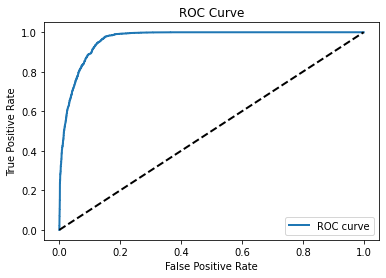

None

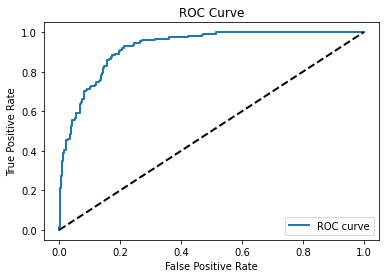

None

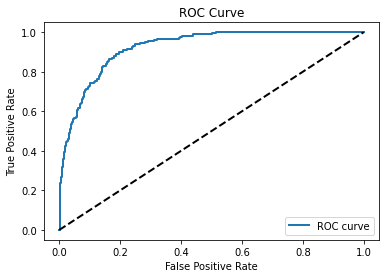

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.849815,0.849301,0.863636,0.163785,0.924057,0.569593


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.909764,0.893663,0.970927,0.147546,0.964459,0.914094


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.846029,0.846015,0.848315,0.15625,0.923666,0.570888


In [ ]:
result_neuralnet_pc4 = runKeras(data_pc4_load, 
                                len(data_pc4_load[0].columns), 
                                batch_size=64, 
                                sampling= 0.9620044401466521, 
                                lr= 0.009987885544631935, 
                                neurons=48.96467060261299, 
                                drop= 0.5772932063039983,
                                layer=1.1035265431139125, 
                                neighbors = 1.0114015158576322,
                                epoch = 15,
                                fold = 7)
print("dev")
display(result_neuralnet_pc4[0])
print("Training")
display(result_neuralnet_pc4[1])
print("Test")
display(result_neuralnet_pc4[2])

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
          #  'regularizer': (1e-4, 1e-2),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (0.15, 1),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=10, n_iter=50)
print(optimizer.max)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.833    |  0.2873   |  4.803    |  0.007588 |  6.388    |  32.8     |  0.8312   |
|  2        |  0.8241   |  0.129    |  4.465    |  0.00641  |  7.373    |  26.03    |  0.994    |
|  3        |  0.8364   |  0.5162   |  1.849    |  0.002636 |  2.651    |  40.21    |  0.905    |
|  4        |  0.8306   |  0.316    |  2.165    |  0.006507 |  2.255    |  39.61    |  0.8733   |
|  5        |  0.8104   |  0.328    |  4.141    |  0.002797 |  5.628    |  54.62    |  0.8093   |
|  6        |  0.8012   |  0.4038   |  1.682    |  0.001585 |  9.54     |  73.28    |  0.9617   |
|  7        |  0.8313   |  0.2523   |  1.391    |  0.007158 |  4.961    |  31.1     |  0.899    |
|  8        |  0.8125   |  0.1172   |  4.637    |  0.003329 |  6.963    |  40.59    |  0.904    |
|  9        |  0.823

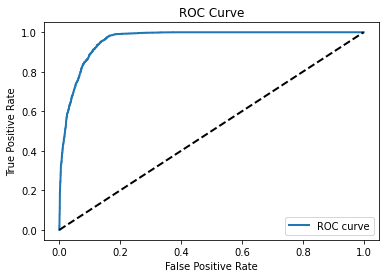

None

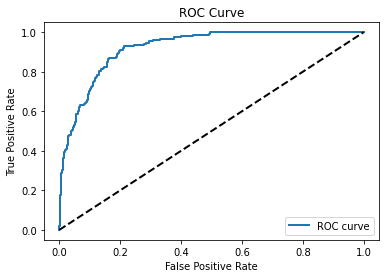

None

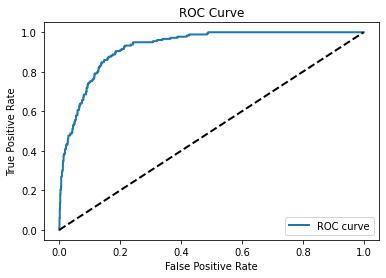

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.850215,0.849152,0.87013,0.169245,0.921712,0.565401


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.906056,0.887896,0.972913,0.156207,0.96189,0.911478


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.855132,0.853871,0.876404,0.165625,0.926073,0.571429


In [ ]:
result_neuralnet_pc4 = runKeras(data_pc4_load, 
                                len(data_pc4_load[0].columns), 
                                batch_size=64, 
                                sampling=0.9654520589623796, 
                                lr= 0.005689579963542236, 
                                neurons=53.220863257192605, 
                                drop= 0.4518392434628723,
                                layer=1.2358676424434183, 
                                neighbors = 1.1173130809985334,
                                epoch = 15,
                                fold = 7)
print("dev")
display(result_neuralnet_pc4[0])
print("Training")
display(result_neuralnet_pc4[1])
print("Test")
display(result_neuralnet_pc4[2])

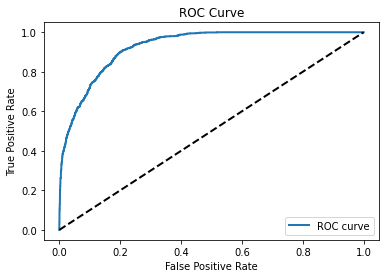

None

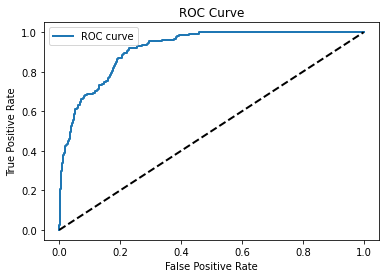

None

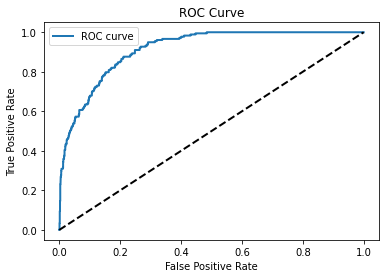

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.544792,0.504086,0.298701,0.006369,0.916807,0.444444


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.54286,0.502531,0.296499,0.006078,0.926473,0.442449


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.538803,0.499444,0.292135,0.00625,0.914078,0.436975


In [ ]:
result_neuralnet_pc4 = runKeras(data_pc4_load, 
                                len(data_pc4_load[0].columns), 
                                batch_size=64, 
                                sampling=0.9654520589623796, 
                                lr= 0.005689579963542236, 
                                neurons=53.220863257192605, 
                                drop= 0.4518392434628723,
                                layer=1.2358676424434183, 
                                neighbors = 1.1173130809985334,
                                epoch = 15,
                                smote = False,
                                fold = 7)
print("dev")
display(result_neuralnet_pc4[0])
print("Training")
display(result_neuralnet_pc4[1])
print("Test")
display(result_neuralnet_pc4[2])

### Keras PC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
          #  'regularizer': (1e-4, 1e-2),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (0.15, 1),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds,
    random_state=42
)

optimizer.maximize(init_points=10, n_iter=50)
print(optimizer.max)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.7303   |  0.2873   |  4.803    |  0.007588 |  6.388    |  32.8     |  0.8312   |
|  2        |  0.8039   |  0.129    |  4.465    |  0.00641  |  7.373    |  26.03    |  0.994    |
|  3        |  0.7883   |  0.5162   |  1.849    |  0.002636 |  2.651    |  40.21    |  0.905    |
|  4        |  0.8117   |  0.316    |  2.165    |  0.006507 |  2.255    |  39.61    |  0.8733   |
|  5        |  0.7912   |  0.328    |  4.141    |  0.002797 |  5.628    |  54.62    |  0.8093   |
|  6        |  0.8079   |  0.4038   |  1.682    |  0.001585 |  9.54     |  73.28    |  0.9617   |
|  7        |  0.7852   |  0.2523   |  1.391    |  0.007158 |  4.961    |  31.1     |  0.899    |
|  8        |  0.7804   |  0.1172   |  4.637    |  0.003329 |  6.963    |  40.59    |  0.904    |
|  9        |  0.800

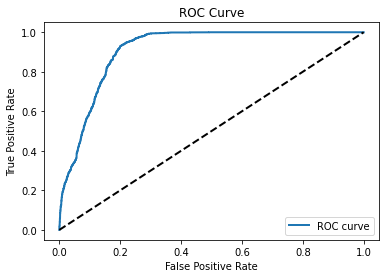

None

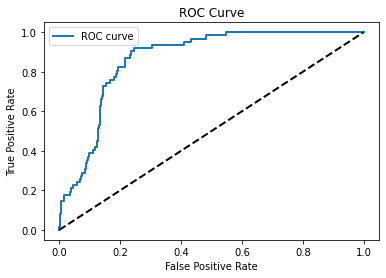

None

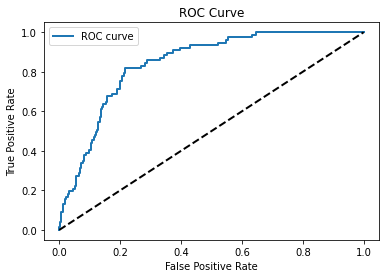

None

dev


,gmeans,bal,recall,pf,auc
0,0.827692,0.810999,0.919355,0.254831,0.864793


Training


,gmeans,bal,recall,pf,auc
0,0.852776,0.826754,0.958788,0.241515,0.910178


Test


,gmeans,bal,recall,pf,auc
0,0.785876,0.784177,0.818182,0.245155,0.842268


In [ ]:
result_neuralnet_pc1 = runKeras(data_pc1_load, 
                                len(data_pc1_load[0].columns), 
                                batch_size=64, 
                                sampling=1.0, 
                                lr= 0.001, 
                                neurons=38.57396826169845, 
                                drop=0.1,
                                layer=5.0, 
                                neighbors = 10.0,
                                epoch = 15, fold = 5)
print("dev")
display(result_neuralnet_pc1[0])
print("Training")
display(result_neuralnet_pc1[1])
print("Test")
display(result_neuralnet_pc1[2])

### Keras PC3

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (0.15, 1),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.7352   |  0.3548   |  3.726    |  0.002747 |  9.555    |  66.33    |  0.972    |
|  2        |  0.7114   |  0.2566   |  1.275    |  0.005263 |  7.909    |  61.47    |  0.9791   |
|  3        |  0.7418   |  0.285    |  3.531    |  0.008381 |  5.329    |  40.95    |  0.9368   |
|  4        |  0.7317   |  0.512    |  3.595    |  0.00559  |  9.296    |  29.57    |  0.8674   |
|  5        |  0.7212   |  0.4383   |  1.915    |  0.002923 |  9.879    |  61.82    |  0.9386   |
|  6        |  0.7371   |  0.442    |  2.673    |  0.009863 |  9.299    |  53.95    |  0.8258   |
|  7        |  0.7282   |  0.5282   |  1.683    |  0.002116 |  8.515    |  51.6     |  0.9153   |
|  8        |  0.7046   |  0.4251   |  2.98     |  0.00273  |  5.728    |  70.79    |  0.8863   |
|  9        |  0.694

In [ ]:
print(optimizer.max)

{'target': 0.753335300245087, 'params': {'drop': 0.6, 'layer': 1.0, 'lr': 0.01, 'neighbors': 10.0, 'neurons': 38.71194825782812, 'sampling': 1.0}}


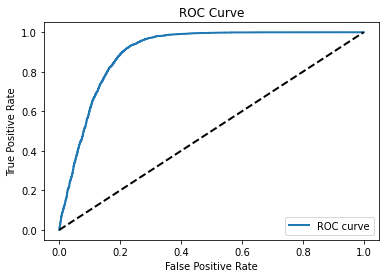

None

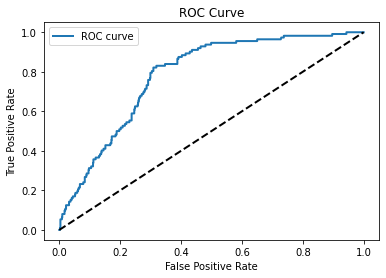

None

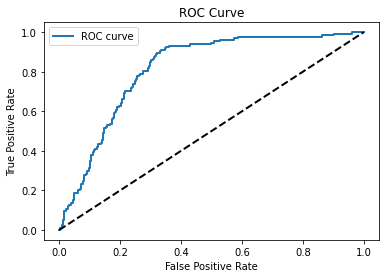

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.753335,0.747573,0.821429,0.309113,0.781893,0.404396


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.838602,0.813363,0.94903,0.258976,0.901026,0.859626


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.760111,0.757291,0.80597,0.283139,0.814715,0.424361


In [ ]:
result_neuralnet_pc3 = runKeras(data_pc3_load, 
                                len(data_pc3_load[0].columns), 
                                batch_size=64, 
                                sampling=1.0, 
                                lr=0.01, 
                                neurons=38.71194825782812, 
                                drop=0.6,
                                layer=1.0, 
                                neighbors = 10.0,
                                epoch = 15, fold = 7)
print("dev")
display(result_neuralnet_pc3[0])
print("Training")
display(result_neuralnet_pc3[1])
print("Test")
display(result_neuralnet_pc3[2])

### Keras KC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (0.15, 1),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.721    |  0.5398   |  2.468    |  0.002722 |  6.049    |  45.93    |  0.9998   |
|  2        |  0.7315   |  0.3567   |  3.278    |  0.009033 |  3.911    |  51.69    |  0.8903   |
|  3        |  0.7288   |  0.4546   |  1.39     |  0.00149  |  7.196    |  66.97    |  0.9256   |
|  4        |  0.7209   |  0.4217   |  3.243    |  0.003015 |  1.153    |  66.23    |  0.8594   |
|  5        |  0.7268   |  0.4225   |  1.813    |  0.003011 |  1.852    |  48.22    |  0.8667   |
|  6        |  0.7385   |  0.492    |  2.589    |  0.001496 |  6.814    |  30.81    |  0.8247   |
|  7        |  0.7238   |  0.4223   |  2.553    |  0.001783 |  1.42     |  58.29    |  0.9983   |
|  8        |  0.7197   |  0.2836   |  1.782    |  0.004684 |  2.052    |  61.75    |  0.8955   |
|  9        |  0.722

In [ ]:
print(optimizer.max)

{'target': 0.7384850601173011, 'params': {'drop': 0.49198240677006777, 'layer': 2.5885404458386163, 'lr': 0.0014956098495028007, 'neighbors': 6.814096942691756, 'neurons': 30.811551891248712, 'sampling': 0.8246594768138066}}


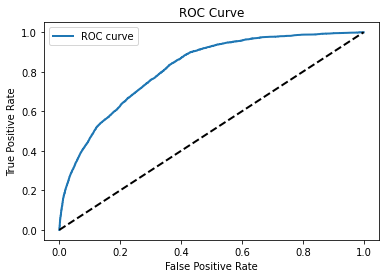

None

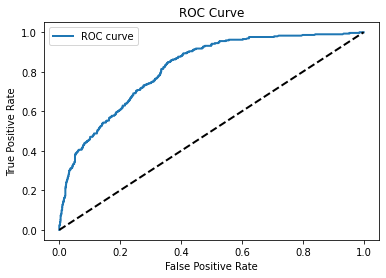

None

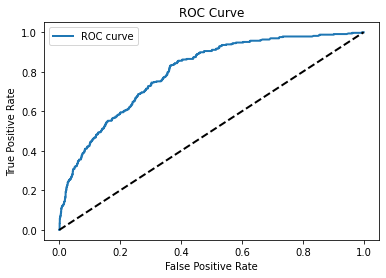

None

dev


,gmeans,bal,recall,pf,auc
0,0.738485,0.726274,0.845361,0.354879,0.817119


Training


,gmeans,bal,recall,pf,auc
0,0.727867,0.722773,0.797613,0.335781,0.816074


Test


,gmeans,bal,recall,pf,auc
0,0.710074,0.707336,0.763804,0.339877,0.798566


In [ ]:
result_neuralnet_kc1 = runKeras(data_kc1_load, 
                                len(data_kc1_load[0].columns), 
                                batch_size=64, 
                                sampling=0.8246594768138066, 
                                lr=0.0014956098495028007, 
                                neurons=30.811551891248712, 
                                drop=0.49198240677006777,
                                layer=2.5885404458386163, 
                                neighbors = 6.814096942691756,
                                epoch = 15, fold = 10)
print("dev")
display(result_neuralnet_kc1[0])
print("Training")
display(result_neuralnet_kc1[1])
print("Test")
display(result_neuralnet_kc1[2])

### Keras KC2

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (0.15, 1),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.8219   |  0.4118   |  2.133    |  0.007397 |  4.459    |  32.53    |  0.8662   |
|  2        |  0.8192   |  0.4923   |  3.191    |  0.00129  |  6.913    |  59.43    |  0.9568   |
|  3        |  0.8124   |  0.2765   |  3.706    |  0.007859 |  3.394    |  31.32    |  0.8937   |
|  4        |  0.811    |  0.4352   |  1.449    |  0.008827 |  8.023    |  43.49    |  0.8714   |
|  5        |  0.8016   |  0.2885   |  1.553    |  0.005046 |  5.444    |  69.84    |  0.9141   |
|  6        |  0.8246   |  0.1811   |  1.889    |  0.002176 |  2.117    |  30.93    |  0.8297   |
|  7        |  0.8014   |  0.5503   |  4.41     |  0.009051 |  9.385    |  25.59    |  0.8622   |
|  8        |  0.7921   |  0.2538   |  4.368    |  0.00892  |  9.304    |  74.58    |  0.9977   |
|  9        |  0.812

In [ ]:
print(optimizer.max)

{'target': 0.8327366284712476, 'params': {'drop': 0.2294162606890958, 'layer': 1.0201441202405892, 'lr': 0.0023592672962582635, 'neighbors': 1.354554716619074, 'neurons': 72.38501919814647, 'sampling': 0.8140454025783583}}


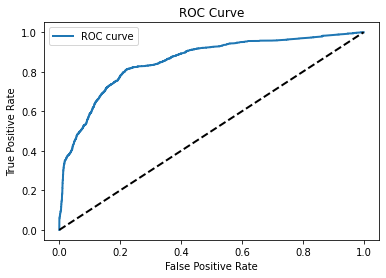

None

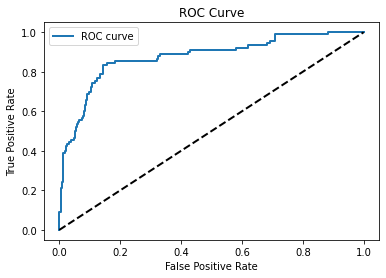

None

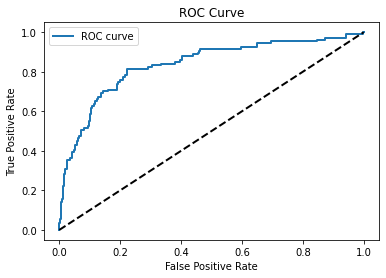

None

dev


,gmeans,bal,recall,pf,auc
0,0.832737,0.83153,0.855556,0.189474,0.874795


Training


,gmeans,bal,recall,pf,auc
0,0.781527,0.778776,0.741651,0.176453,0.853418


Test


,gmeans,bal,recall,pf,auc
0,0.758334,0.754873,0.71028,0.190361,0.835694


In [ ]:
result_neuralnet_kc2 = runKeras(data_kc2_load, 
                                len(data_kc2_load[0].columns), 
                                batch_size=64, 
                                sampling=0.8140454025783583, 
                                lr=0.0023592672962582635, 
                                neurons=72.38501919814647, 
                                drop=0.2294162606890958,
                                layer=1.0201441202405892, 
                                neighbors = 1.354554716619074,
                                epoch = 15, fold = 10)
print("dev")
display(result_neuralnet_kc2[0])
print("Training")
display(result_neuralnet_kc2[1])
print("Test")
display(result_neuralnet_kc2[2])

### Keras JM1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'lr': (0.001, 0.01),
           'drop': (0.1, 0.6),
           'layer': (1, 5),
           'neurons': (25, 75),
          #  'batch_size': (0.15, 1),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
optimizer = BayesianOptimization(
    f=gridNeuralNet,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   |   drop    |   layer   |    lr     | neighbors |  neurons  | sampling  |
-------------------------------------------------------------------------------------------------
|  1        |  0.6417   |  0.3012   |  4.321    |  0.009343 |  3.46     |  59.97    |  0.9865   |
|  2        |  0.6464   |  0.3773   |  4.352    |  0.005747 |  3.014    |  30.47    |  0.8887   |
|  3        |  0.6415   |  0.1768   |  4.506    |  0.006343 |  3.704    |  52.9     |  0.8237   |
|  4        |  0.6399   |  0.274    |  4.249    |  0.004598 |  7.517    |  50.31    |  0.8492   |
|  5        |  0.6465   |  0.2817   |  1.63     |  0.003117 |  7.486    |  58.99    |  0.8253   |
|  6        |  0.644    |  0.2709   |  2.749    |  0.002805 |  7.638    |  42.38    |  0.8378   |
|  7        |  0.6177   |  0.3363   |  3.928    |  0.008247 |  4.787    |  49.89    |  0.8345   |
|  8        |  0.6282   |  0.4852   |  3.519    |  0.004701 |  7.36     |  72.42    |  0.856    |
|  9        |  0.63 

In [ ]:
print(optimizer.max)

{'target': 0.6528638800210265, 'params': {'drop': 0.1, 'layer': 1.0, 'lr': 0.0010000000648454968, 'neighbors': 1.0, 'neurons': 49.688144618069096, 'sampling': 1.0}}


In [ ]:
result_neuralnet_kc2 = runKeras(data_jm1_load, 
                                len(data_jm1_load[0].columns), 
                                batch_size=64, 
                                sampling=1, 
                                lr=0.0010000000648454968, 
                                neurons=49.688144618069096, 
                                drop=0.1,
                                layer=1.0201441202405892, 
                                neighbors = 1.0,
                                epoch = 5, fold = 10)
print("dev")
display(result_neuralnet_kc2[0])
print("Training")
display(result_neuralnet_kc2[1])
print("Test")
display(result_neuralnet_kc2[2])

TypeError: ignored

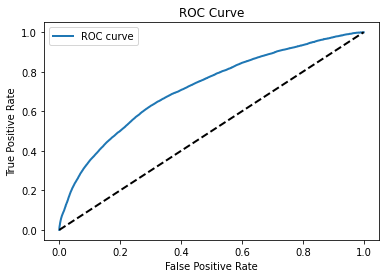

None

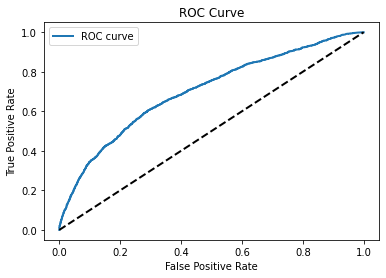

None

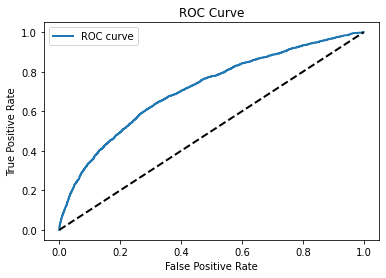

None

dev


,gmeans,bal,recall,pf,auc
0,0.652864,0.649999,0.591053,0.278861,0.701409


Training


,gmeans,bal,recall,pf,auc
0,0.659674,0.657043,0.601733,0.276806,0.717147


Test


,gmeans,bal,recall,pf,auc
0,0.657439,0.654588,0.596767,0.275721,0.711832


In [ ]:
result_neuralnet_kc2 = runKeras(data_jm1_load, 
                                len(data_jm1_load[0].columns), 
                                batch_size=64, 
                                sampling=1, 
                                lr=0.0010000000648454968, 
                                neurons=49.688144618069096, 
                                drop=0.1,
                                layer=1.0201441202405892, 
                                neighbors = 1.0,
                                epoch = 15, fold = 10)
print("dev")
display(result_neuralnet_kc2[0])
print("Training")
display(result_neuralnet_kc2[1])
print("Test")
display(result_neuralnet_kc2[2])

## Machine Learning Traditional

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

modelrf=RandomForestClassifier(random_state=42)
modelnb = GaussianNB()
modellogreg = LogisticRegression()
modeldt = DecisionTreeClassifier()
modelsvm = SVC()

## Random Forest Opt

In [ ]:
def runrf (data = data_pc4_load, 
              sampling = 1,
              neighbors = 5,
              smote = True, 
              depth = 10, 
              estimator = 100,
              fold = 10):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0

  
  y_true_train, y_true_dev, y_true_test, Y_pred_train, Y_pred_dev, Y_pred_test  = [], [], [], [], [], []
  gmins = []
  depth = int(np.round(depth,0))
  estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)

  for remainder, test in fold_generator():
      repro()
      fold_i += 1

      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train)


      model = RandomForestClassifier(random_state=42, max_depth=depth, n_estimators=estimator)
      model.fit(X_train, y_train)

      Y_pred_train_temp = model.predict_proba(X_train)
      Y_pred_test_temp = model.predict_proba(X_test)
      Y_pred_dev_temp = model.predict_proba(X_dev)

      # Y_pred_train_temp , Y_pred_test_temp, Y_pred_dev_temp = Y_pred_train_temp.round(), Y_pred_test_temp.round(), Y_pred_dev_temp.round()


      y_true_dev = np.append(y_true_dev, y_dev)
      Y_pred_dev = np.append(Y_pred_dev, Y_pred_dev_temp[:,1])

      y_true_train = np.append(y_true_train, y_train)
      Y_pred_train = np.append(Y_pred_train, Y_pred_train_temp[:,1])

      y_true_test = np.append(y_true_test, y_test)
      Y_pred_test = np.append(Y_pred_test, Y_pred_test_temp[:,1])
  # print(len(y_true_dev));print(len(Y_pred_dev))
  result_train = eval(y_true_train, Y_pred_train)
  result_dev = eval(y_true_dev, Y_pred_dev)
  result_test = eval(y_true_test, Y_pred_test)

  return result_dev[0], result_train[0], result_test[0]

In [ ]:

def gridrf(data = data_pc4_load, 
           sampling = 1,
           neighbors = 5,
           smote = True, 
           depth = 10, 
           estimator = 100, fold = 7):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  
  tn = 0; fp = 0; fn = 0; tp = 0
  result = []
  
  depth = int(np.round(depth,0))
  estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  for remainder, test in fold_generator():
      repro()
      fold_i += 1
    
      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    

      model = RandomForestClassifier(random_state=42, max_depth=depth, n_estimators=estimator, )
      model.fit(X_train, y_train)
      Y_pred_dev_temp = model.predict(X_dev)
      Y_pred_dev_temp = Y_pred_dev_temp.round()
      # result.append(gmeans(y_test=y_dev, Y_pred=Y_pred_dev_temp))

      tn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][0].ravel()
      fp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][1].ravel()
      fn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][0].ravel()
      tp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][1].ravel()

  pf = fp/(fp+tn)
  pd = tp/(tp+fn)

  gmeans = math.sqrt(pd*(1-pf))
  return gmeans

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (5, 10),
           'estimator': (100, 300),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=30, n_iter=50, acq='ei', xi=1e-1)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.8294   |  8.564    |  185.5    |  4.692    |  0.9771   |
|  2        |  0.8294   |  5.532    |  271.0    |  6.395    |  0.9588   |
|  3        |  0.8086   |  7.505    |  129.2    |  7.479    |  0.8001   |
|  4        |  0.8127   |  9.703    |  192.5    |  5.217    |  0.8442   |
|  5        |  0.826    |  7.839    |  152.9    |  2.255    |  0.8526   |
|  6        |  0.8382   |  6.724    |  202.2    |  6.02     |  0.9554   |
|  7        |  0.8245   |  6.044    |  173.8    |  8.535    |  0.8136   |
|  8        |  0.8272   |  9.697    |  230.8    |  9.303    |  0.8065   |
|  9        |  0.8358   |  7.72     |  179.7    |  5.628    |  0.9195   |
|  10       |  0.8098   |  8.822    |  237.2    |  1.123    |  0.8033   |
|  11       |  0.8035   |  8.155    |  134.6    |  7.072    |  0.9902   |
|  12       |  0.8138   |  7.267    | 

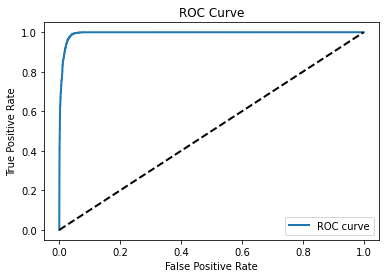

None

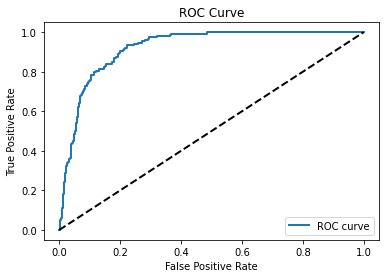

None

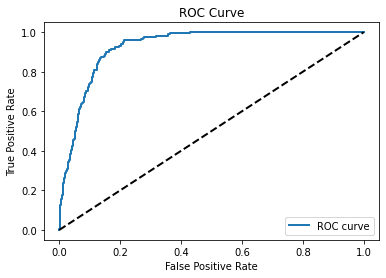

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.838226,0.835414,0.805195,0.127389,0.921653,0.593301


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.953325,0.935532,1.0,0.091172,0.994355,0.954456


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.853333,0.851953,0.831461,0.124219,0.92787,0.610309


In [ ]:
result_rf_pc4 = runrf (data = data_pc4_load, 
                       sampling =  0.9554321216530162,
                       neighbors = 6.019540595816467,
                       smote = True, 
                       depth = 6.7238968516610225, 
                       estimator = 202.16127378531803,
                       fold = 7)
print("dev")
display(result_rf_pc4[0])
print("Training")
display(result_rf_pc4[1])
print("Test")
display(result_rf_pc4[2])

### rf PC4

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (5, 10),
           'estimator': (100, 300),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)

NameError: ignored

In [ ]:
print(optimizer.max)

{'target': 0.8401970076496915, 'params': {'depth': 9.902490001197542, 'estimator': 287.830954410735, 'neighbors': 9.524991051170778, 'sampling': 0.9774170917788307}}


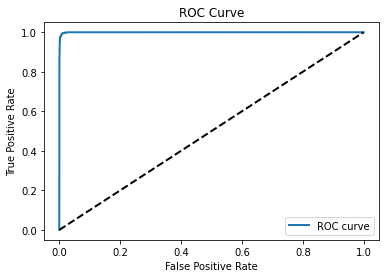

None

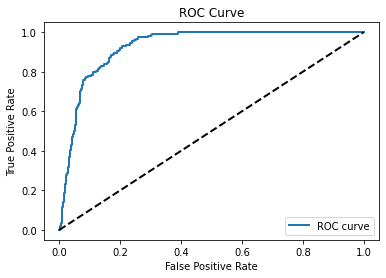

None

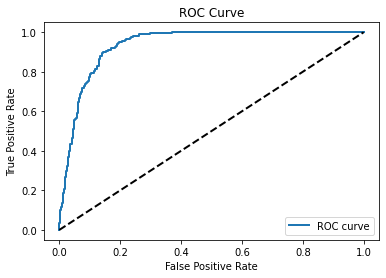

None

dev


,gmeans,bal,recall,pf,auc
0,0.840197,0.828062,0.772727,0.086442,0.927744


Training


,gmeans,bal,recall,pf,auc
0,0.975852,0.966262,1.0,0.047713,0.999623


Test


,gmeans,bal,recall,pf,auc
0,0.83032,0.819429,0.764045,0.097656,0.93448


In [ ]:
result_rf_pc4 = runrf (data = data_pc4_load, 
                       sampling = 0.9774170917788307,
                       neighbors = 9.524991051170778,
                       smote = True, 
                       depth = 9.902490001197542, 
                       estimator = 287.830954410735,
                       fold = 7)
print("dev")
display(result_rf_pc4[0])
print("Training")
display(result_rf_pc4[1])
print("Test")
display(result_rf_pc4[2])

1253
1253


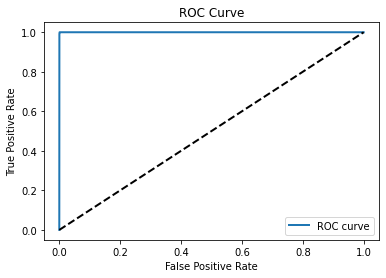

None

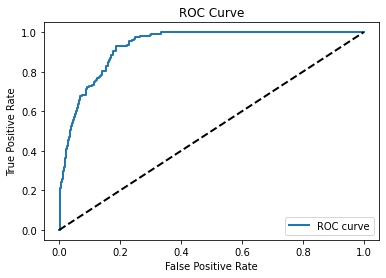

None

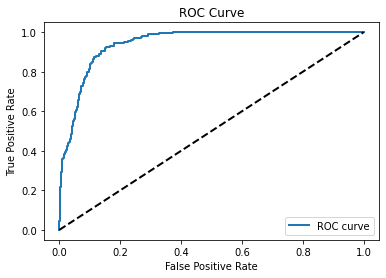

None

dev


,gmeans,bal,recall,pf,auc
0,0.591877,0.545231,0.357143,0.019108,0.930852


Training


,gmeans,bal,recall,pf,auc
0,0.996958,0.996108,0.99453,0.000608,0.99996


Test


,gmeans,bal,recall,pf,auc
0,0.596573,0.547077,0.359551,0.010156,0.942319


In [ ]:
result_rf_pc4 = runrf (data = data_pc4_load, 
                       sampling = 0.9774170917788307,
                       neighbors = 9.524991051170778,
                       smote = False, 
                       depth = 9.902490001197542, 
                       estimator = 287.830954410735,
                       fold = 7)
print("dev")
display(result_rf_pc4[0])
print("Training")
display(result_rf_pc4[1])
print("Test")
display(result_rf_pc4[2])

### rf PC3

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.7249   |  1.834    |  97.97    |  1.932    |  0.9568   |
|  2        |  0.712    |  9.553    |  88.35    |  7.054    |  0.9217   |
|  3        |  0.7274   |  4.512    |  147.5    |  3.437    |  0.8837   |
|  4        |  0.7463   |  4.085    |  111.0    |  5.508    |  0.9087   |
|  5        |  0.7037   |  1.034    |  134.1    |  9.073    |  0.8656   |
|  6        |  0.691    |  8.847    |  20.75    |  6.802    |  0.9279   |
|  7        |  0.7258   |  1.965    |  113.3    |  3.075    |  0.8856   |
|  8        |  0.6973   |  8.183    |  23.24    |  9.074    |  0.8012   |
|  9        |  0.7286   |  5.044    |  37.26    |  5.974    |  0.8323   |
|  10       |  0.7395   |  5.106    |  81.39    |  1.034    |  0.9167   |
|  11       |  0.6922   |  1.0      |  10.0     |  10.0     |  0.8      |
|  12       |  0.6999   |  9.644    | 

924
924


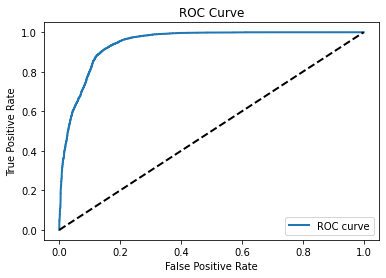

None

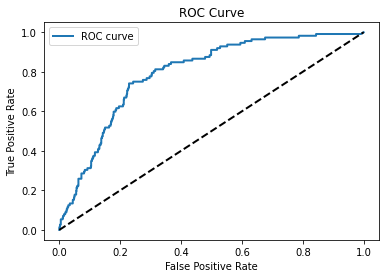

None

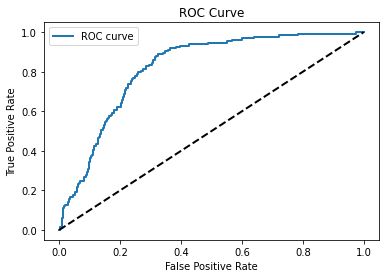

None

dev


,gmeans,bal,recall,pf,auc
0,0.746296,0.746279,0.75,0.257389,0.793186


Training


,gmeans,bal,recall,pf,auc
0,0.872958,0.852481,0.957708,0.204292,0.94393


Test


,gmeans,bal,recall,pf,auc
0,0.751062,0.750857,0.738806,0.236479,0.819716


In [ ]:
result_rf_pc3 = runrf (data = data_pc3_load, 
                       sampling = 0.9087336389293741,
                       neighbors = 5.507654754457446,
                       smote = True, 
                       depth = 4.084591991419215, 
                       estimator =110.96799035807604, fold = 7)
print("dev")
display(result_rf_pc3[0])
print("Training")
display(result_rf_pc3[1])
print("Test")
display(result_rf_pc3[2])

924
924


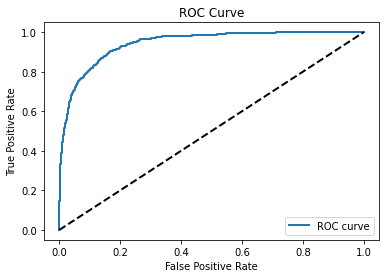

None

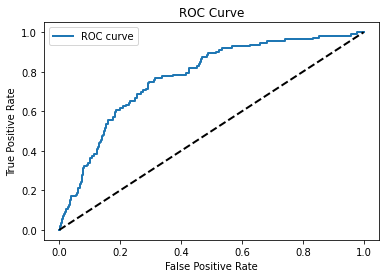

None

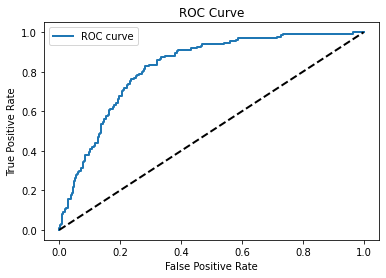

None

dev


,gmeans,bal,recall,pf,auc
0,0.16326,0.311825,0.026786,0.004926,0.773421


Training


,gmeans,bal,recall,pf,auc
0,0.342058,0.375661,0.117052,0.000413,0.943854


Test


,gmeans,bal,recall,pf,auc
0,0.172315,0.313991,0.029851,0.005302,0.822312


In [ ]:
result_rf_pc3 = runrf (data = data_pc3_load, 
                       sampling = 0.9087336389293741,
                       neighbors = 5.507654754457446,
                       smote = False, 
                       depth = 4.084591991419215, 
                       estimator =110.96799035807604, fold = 7)
print("dev")
display(result_rf_pc3[0])
print("Training")
display(result_rf_pc3[1])
print("Test")
display(result_rf_pc3[2])

### rf PC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.6421   |  8.322    |  28.76    |  6.829    |  0.8961   |
|  2        |  0.7195   |  2.8      |  69.36    |  6.721    |  0.9456   |
|  3        |  0.6399   |  8.065    |  102.4    |  3.494    |  0.9048   |
|  4        |  0.7152   |  1.545    |  98.05    |  1.891    |  0.8236   |
|  5        |  0.6721   |  3.613    |  10.29    |  5.467    |  0.8318   |
|  6        |  0.6825   |  4.775    |  139.1    |  5.496    |  0.8581   |
|  7        |  0.6323   |  9.914    |  30.74    |  9.601    |  0.9934   |
|  8        |  0.6404   |  8.626    |  15.23    |  9.197    |  0.852    |
|  9        |  0.7285   |  3.016    |  117.3    |  6.849    |  0.9568   |
|  10       |  0.6384   |  7.045    |  104.1    |  8.365    |  0.8027   |
|  11       |  0.7108   |  1.0      |  41.56    |  10.0     |  0.8909   |
|  12       |  0.7207   |  1.105    | 

890
890


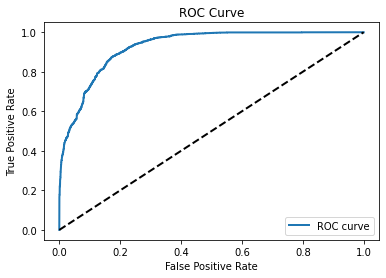

None

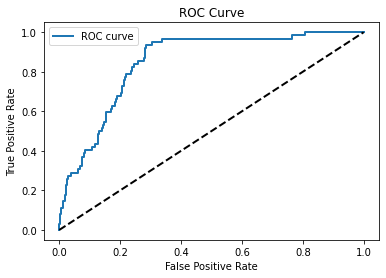

None

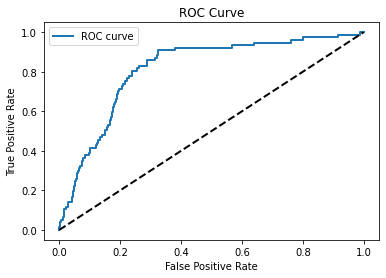

None

dev


,gmeans,bal,recall,pf,auc
0,0.757732,0.756241,0.725806,0.208937,0.848625


Training


,gmeans,bal,recall,pf,auc
0,0.846608,0.841346,0.892552,0.19697,0.927098


Test


,gmeans,bal,recall,pf,auc
0,0.764594,0.763696,0.74026,0.210271,0.814394


In [ ]:
result_rf_pc1 = runrf (data = data_pc1_load, 
                       sampling = 0.9567892037383374,
                       neighbors = 6.848853012572272,
                       smote = True, 
                       depth = 3.016291507153217, 
                       estimator =117.25610831248116,
                       fold = 5)
print("dev")
display(result_rf_pc1[0])
print("Training")
display(result_rf_pc1[1])
print("Test")
display(result_rf_pc1[2])

### rf KC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.724    |  3.925    |  68.12    |  2.738    |  0.9659   |
|  2        |  0.7256   |  9.132    |  92.16    |  6.352    |  0.982    |
|  3        |  0.7316   |  6.591    |  26.66    |  8.717    |  0.8526   |
|  4        |  0.7329   |  2.332    |  59.71    |  4.27     |  0.9551   |
|  5        |  0.745    |  7.153    |  37.51    |  1.997    |  0.9955   |
|  6        |  0.7273   |  8.072    |  140.6    |  2.456    |  0.9313   |
|  7        |  0.7453   |  3.491    |  39.92    |  4.799    |  0.9736   |
|  8        |  0.7357   |  2.779    |  133.8    |  9.961    |  0.9008   |
|  9        |  0.7199   |  7.033    |  107.9    |  7.899    |  0.833    |
|  10       |  0.7283   |  5.128    |  25.13    |  6.524    |  0.8404   |
|  11       |  0.7153   |  9.302    |  149.0    |  9.912    |  0.8313   |
|  12       |  0.7329   |  1.918    | 

1900
1900


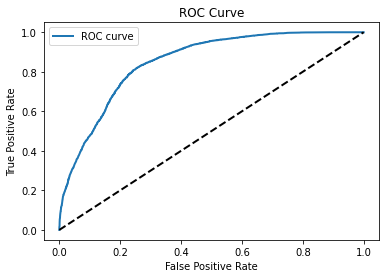

None

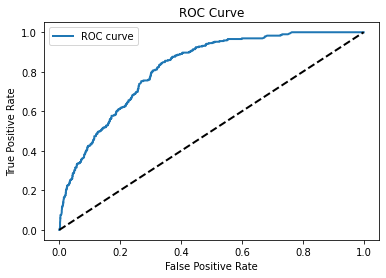

None

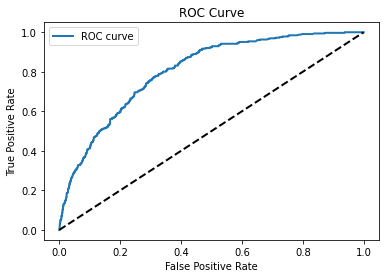

None

dev


,gmeans,bal,recall,pf,auc
0,0.745312,0.733287,0.848797,0.345556,0.818835


Training


,gmeans,bal,recall,pf,auc
0,0.766816,0.753141,0.869661,0.323868,0.849594


Test


,gmeans,bal,recall,pf,auc
0,0.726162,0.721729,0.791411,0.333707,0.803188


In [ ]:
result_rf_kc1 = runrf (data = data_kc1_load, 
                       sampling = 0.9735776128452208,
                       neighbors = 4.798664732366373,
                       smote = True, 
                       depth = 3.490826986187748, 
                       estimator =39.92036512731981, fold = 10)
print("dev")
display(result_rf_kc1[0])
print("Training")
display(result_rf_kc1[1])
print("Test")
display(result_rf_kc1[2])

### rf KC2

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=30, n_iter=50)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.8205   |  1.377    |  69.42    |  1.684    |  0.8967   |
|  2        |  0.8206   |  1.273    |  35.16    |  8.413    |  0.9115   |
|  3        |  0.7504   |  9.69     |  112.3    |  6.939    |  0.9932   |
|  4        |  0.8148   |  3.584    |  15.34    |  7.647    |  0.9066   |
|  5        |  0.8258   |  2.931    |  37.9     |  1.957    |  0.9024   |
|  6        |  0.8177   |  3.32     |  82.97    |  8.245    |  0.9809   |
|  7        |  0.819    |  3.128    |  20.98    |  6.091    |  0.8812   |
|  8        |  0.7763   |  7.36     |  85.64    |  3.142    |  0.8533   |
|  9        |  0.8131   |  6.135    |  59.97    |  2.566    |  0.8926   |
|  10       |  0.7371   |  7.872    |  129.5    |  1.877    |  0.8097   |
|  11       |  0.8138   |  2.041    |  125.3    |  2.691    |  0.9139   |
|  12       |  0.8214   |  6.53     | 

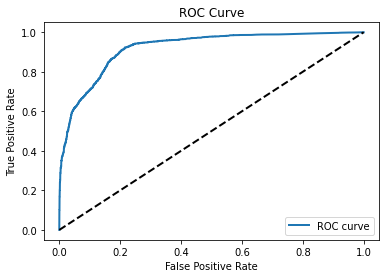

None

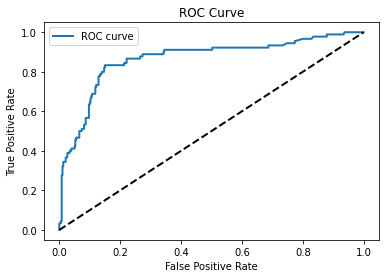

None

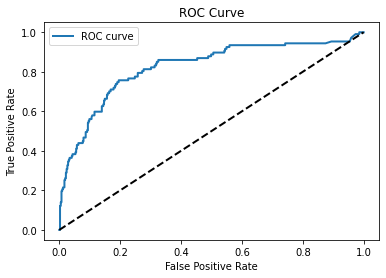

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.837708,0.83766,0.833333,0.157895,0.864459,0.666667


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.828328,0.826929,0.804037,0.146647,0.919356,0.810281


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.765075,0.760334,0.71028,0.175904,0.822666,0.59375


In [ ]:
result_rf_kc2 = runrf (data = data_kc2_load, 
                       sampling = 0.8128495528690206,
                       neighbors =6.581050574990373,
                       smote = True, 
                       depth = 3.196503441869485, 
                       estimator =56.63728286449427, fold = 10)
# result_rf_kc2
print("dev")
display(result_rf_kc2[0])
print("Training")
display(result_rf_kc2[1])
print("Test")
display(result_rf_kc2[2])

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.8165   |  2.418    |  50.88    |  5.699    |  0.8556   |
|  2        |  0.8148   |  4.614    |  62.73    |  7.457    |  0.9129   |
|  3        |  0.8174   |  4.989    |  73.03    |  1.836    |  0.9413   |
|  4        |  0.7834   |  8.084    |  43.7     |  1.427    |  0.9346   |
|  5        |  0.8311   |  3.785    |  78.61    |  3.379    |  0.8775   |
|  6        |  0.8121   |  4.843    |  116.4    |  5.96     |  0.9945   |
|  7        |  0.8192   |  2.434    |  31.69    |  8.333    |  0.8505   |
|  8        |  0.8026   |  6.385    |  30.31    |  5.73     |  0.9585   |
|  9        |  0.8295   |  4.283    |  41.31    |  2.658    |  0.808    |
|  10       |  0.8422   |  4.565    |  25.74    |  5.406    |  0.9329   |
|  11       |  0.8111   |  1.0      |  150.0    |  10.0     |  0.8      |
|  12       |  0.8178   |  3.148    | 

470
470


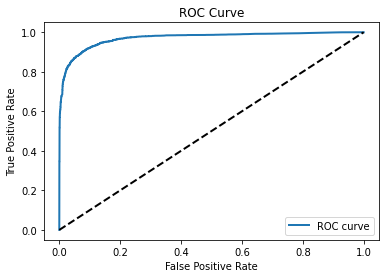

None

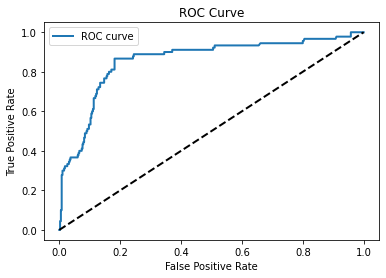

None

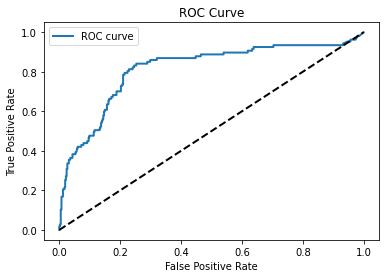

None

dev


,gmeans,bal,recall,pf,auc
0,0.842198,0.840707,0.866667,0.181579,0.856754


Training


,gmeans,bal,recall,pf,auc
0,0.90612,0.902244,0.93536,0.122206,0.970244


Test


,gmeans,bal,recall,pf,auc
0,0.752207,0.748404,0.700935,0.192771,0.813309


In [ ]:
result_rf_kc2 = runrf (data = data_kc2_load, 
                       sampling = 0.9328739233041922,
                       neighbors =5,
                       smote = True, 
                       depth = 5, 
                       estimator =26, fold = 10)
print("dev")
display(result_rf_kc2[0])
print("Training")
display(result_rf_kc2[1])
print("Test")
display(result_rf_kc2[2])

### rf JM1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'estimator': (10, 150),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridrf,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | estimator | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.6322   |  9.599    |  120.6    |  9.809    |  0.932    |
|  2        |  0.6296   |  4.331    |  28.71    |  7.108    |  0.8031   |
|  3        |  0.6407   |  3.318    |  109.9    |  3.684    |  0.8905   |
|  4        |  0.6419   |  1.479    |  105.9    |  9.811    |  0.9557   |
|  5        |  0.644    |  3.722    |  83.22    |  5.074    |  0.931    |
|  6        |  0.634    |  4.637    |  118.4    |  4.753    |  0.8784   |
|  7        |  0.6164   |  9.513    |  88.24    |  3.544    |  0.864    |
|  8        |  0.633    |  3.302    |  91.06    |  3.183    |  0.8182   |
|  9        |  0.6464   |  2.574    |  106.4    |  7.574    |  0.9727   |
|  10       |  0.6197   |  9.945    |  120.7    |  9.989    |  0.8714   |
|  11       |  0.6441   |  1.0      |  150.0    |  10.0     |  1.0      |
|  12       |  0.6378   |  10.0     | 

9800
9800


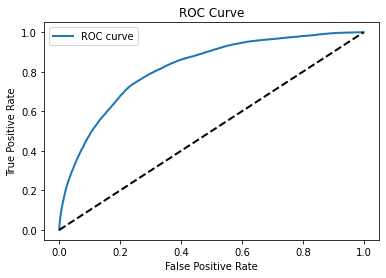

None

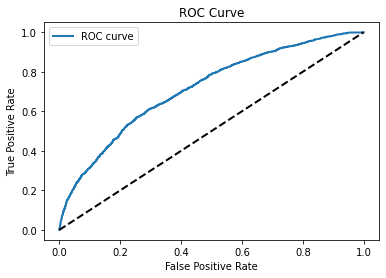

None

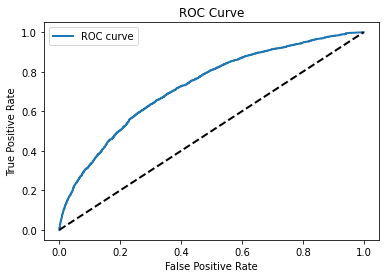

None

dev


,gmeans,bal,recall,pf,auc
0,0.651624,0.646477,0.57,0.255063,0.713979


Training


,gmeans,bal,recall,pf,auc
0,0.747564,0.747551,0.744504,0.249364,0.819378


Test


,gmeans,bal,recall,pf,auc
0,0.661485,0.656912,0.586781,0.254301,0.727493


In [ ]:
result_rf_jm1 = runrf (data = data_jm1_load, 
                       sampling = 0.9988600530802827,
                       neighbors = 4.779011736380611,
                       smote = True, 
                       depth = 5.093154740190321, 
                       estimator =56.54771464155258)
print("dev")
display(result_rf_jm1[0])
print("Training")
display(result_rf_jm1[1])
print("Test")
display(result_rf_jm1[2])

## Decission Tree Opt

In [ ]:

def griddt(data = data_pc3_load, 
           sampling = 1,
           neighbors = 5,
           smote = True, 
           depth = 10):
  repro()
  fold_generator = split(data)
  fold_i = 0
  
  tn = 0; fp = 0; fn = 0; tp = 0
  result = []
  
  depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  for remainder, test in fold_generator():
      repro()
      fold_i += 1
    
      train, dev = next(split(remainder)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    

      model = DecisionTreeClassifier(max_depth= depth)
      model.fit(X_train, y_train)
      Y_pred_dev_temp = model.predict(X_dev)
      Y_pred_dev_temp = Y_pred_dev_temp.round()
      # result.append(gmeans(y_test=y_dev, Y_pred=Y_pred_dev_temp))

      tn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][0].ravel()
      fp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][1].ravel()
      fn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][0].ravel()
      tp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][1].ravel()

  pf = fp/(fp+tn)
  pd = tp/(tp+fn)

  gmeans = math.sqrt(pd*(1-pf))
  return gmeans

In [ ]:
def rundt (data = data_kc2_load, 
              sampling = 1,
              neighbors = 5,
              smote = True, 
              depth = 10,
              fold  =10):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  tn_train = 0; fp_train = 0; fn_train = 0; tp_train = 0
  tn_dev = 0; fp_dev = 0; fn_dev = 0; tp_dev = 0
  tn_test = 0; fp_test = 0; fn_test = 0; tp_test = 0

  
  y_true_train, y_true_dev, y_true_test, Y_pred_train, Y_pred_dev, Y_pred_test  = [], [], [], [], [], []
  gmins = []
  depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)

  for remainder, test in fold_generator():
      repro()
      fold_i += 1

      train, dev = next(split(remainder,fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train)


      model = DecisionTreeClassifier(max_depth= depth)
      model.fit(X_train, y_train)

      Y_pred_train_temp = model.predict_proba(X_train)
      Y_pred_test_temp = model.predict_proba(X_test)
      Y_pred_dev_temp = model.predict_proba(X_dev)

      # Y_pred_train_temp , Y_pred_test_temp, Y_pred_dev_temp = Y_pred_train_temp.round(), Y_pred_test_temp.round(), Y_pred_dev_temp.round()


      y_true_dev = np.append(y_true_dev, y_dev)
      Y_pred_dev = np.append(Y_pred_dev, Y_pred_dev_temp[:,1])

      y_true_train = np.append(y_true_train, y_train)
      Y_pred_train = np.append(Y_pred_train, Y_pred_train_temp[:,1])

      y_true_test = np.append(y_true_test, y_test)
      Y_pred_test = np.append(Y_pred_test, Y_pred_test_temp[:,1])
  # print(len(y_true_dev));print(len(Y_pred_dev))
  result_train = eval(y_true_train, Y_pred_train)
  result_dev = eval(y_true_dev, Y_pred_dev)
  result_test = eval(y_true_test, Y_pred_test)

  return result_dev[0], result_train[0], result_test[0]

### KC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=griddt,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.7036   |  1.556    |  5.148    |  0.8172   |
|  2        |  0.6561   |  7.552    |  2.361    |  0.9195   |
|  3        |  0.7149   |  4.519    |  1.134    |  0.8812   |
|  4        |  0.6939   |  5.668    |  2.22     |  0.9189   |
|  5        |  0.6768   |  6.676    |  5.581    |  0.8814   |
|  6        |  0.6796   |  7.017    |  4.868    |  0.9125   |
|  7        |  0.7078   |  2.556    |  3.046    |  0.9902   |
|  8        |  0.7143   |  3.544    |  3.429    |  0.8501   |
|  9        |  0.6679   |  6.736    |  7.431    |  0.8765   |
|  10       |  0.6874   |  7.75     |  4.376    |  0.9614   |
|  11       |  0.6917   |  10.0     |  10.0     |  0.8      |
|  12       |  0.7027   |  1.0      |  10.0     |  1.0      |
|  13       |  0.6631   |  9.985    |  6.447    |  0.8952   |
|  14       |  0.7061   |  1.003    |  1.01     |  0.8797   |
|  15   

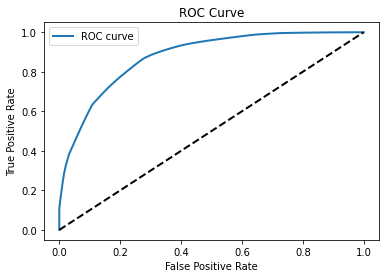

None

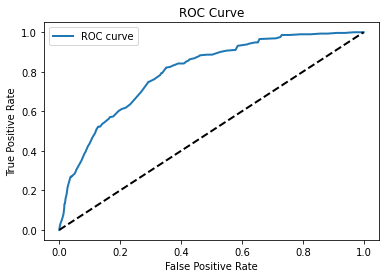

None

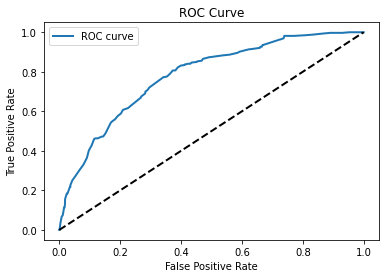

None

dev


,gmeans,bal,recall,pf,auc
0,0.722534,0.722494,0.728522,0.283406,0.798707


Training


,gmeans,bal,recall,pf,auc
0,0.792085,0.783954,0.863277,0.273237,0.877051


Test


,gmeans,bal,recall,pf,auc
0,0.706747,0.706637,0.696319,0.28267,0.780079


In [ ]:
result_dt_kc1 = rundt (data = data_kc1_load, 
                       sampling = 1.0,
                       neighbors = 4.384439842610561,
                       smote = True, 
                       depth = 3.659573182993966)
print("dev")
display(result_dt_kc1[0])
print("Training")
display(result_dt_kc1[1])
print("Test")
display(result_dt_kc1[2])

### JM1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=griddt,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.602    |  7.769    |  8.258    |  0.8219   |
|  2        |  0.6006   |  7.222    |  3.059    |  0.8934   |
|  3        |  0.6332   |  6.244    |  9.85     |  0.9693   |
|  4        |  0.5982   |  8.707    |  9.803    |  0.9754   |
|  5        |  0.6131   |  5.119    |  7.79     |  0.8697   |
|  6        |  0.6057   |  9.895    |  4.125    |  0.8377   |
|  7        |  0.6383   |  3.088    |  1.234    |  0.8143   |
|  8        |  0.6003   |  7.22     |  1.793    |  0.8761   |
|  9        |  0.6283   |  8.178    |  9.203    |  0.9486   |
|  10       |  0.5971   |  6.948    |  2.858    |  0.8741   |
|  11       |  0.6459   |  1.0      |  10.0     |  1.0      |
|  12       |  0.6445   |  1.0      |  4.631    |  1.0      |
|  13       |  0.6453   |  1.037    |  1.088    |  0.9608   |
|  14       |  0.6135   |  9.996    |  1.198    |  0.9939   |
|  15   

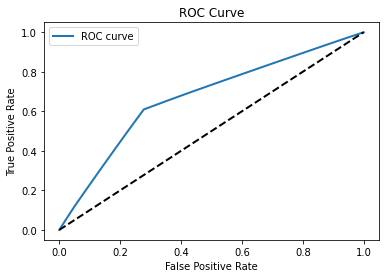

None

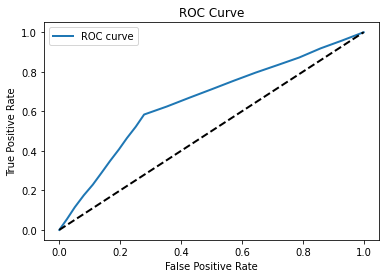

None

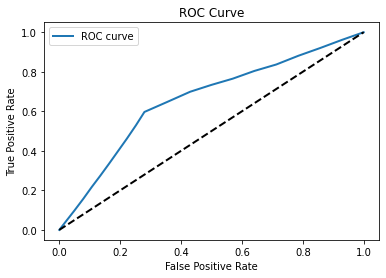

None

dev


,gmeans,bal,recall,pf,auc
0,0.648895,0.645782,0.583684,0.278608,0.651836


Training


,gmeans,bal,recall,pf,auc
0,0.663522,0.661178,0.609403,0.277552,0.670048


Test


,gmeans,bal,recall,pf,auc
0,0.655626,0.652988,0.596767,0.279708,0.659599


In [ ]:
result_dt_kc1 = rundt (data = data_jm1_load, 
                       sampling = 0.8230996744661389,
                       neighbors = 3,
                       smote = True, 
                       depth = 1)
print("dev")
display(result_dt_kc1[0])
print("Training")
display(result_dt_kc1[1])
print("Test")
display(result_dt_kc1[2])

### KC2

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=griddt,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.703    |  4.635    |  3.095    |  0.8143   |
|  2        |  0.7301   |  5.322    |  6.989    |  0.839    |
|  3        |  0.7239   |  4.79     |  2.479    |  0.9977   |
|  4        |  0.8095   |  1.513    |  6.457    |  0.9471   |
|  5        |  0.7881   |  2.604    |  9.433    |  0.8244   |
|  6        |  0.725    |  8.3      |  9.018    |  0.9874   |
|  7        |  0.7602   |  2.804    |  6.691    |  0.9252   |
|  8        |  0.8105   |  2.484    |  5.335    |  0.9436   |
|  9        |  0.6721   |  9.389    |  4.068    |  0.8653   |
|  10       |  0.7165   |  4.345    |  1.665    |  0.802    |
|  11       |  0.8137   |  1.0      |  1.0      |  1.0      |
|  12       |  0.6832   |  10.0     |  1.0      |  1.0      |
|  13       |  0.8003   |  1.0      |  10.0     |  1.0      |
|  14       |  0.8203   |  1.009    |  3.67     |  0.9408   |
|  15   

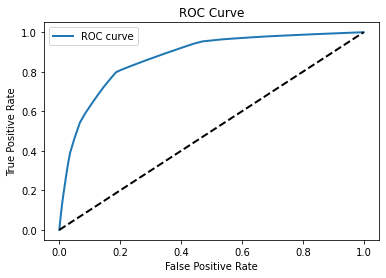

None

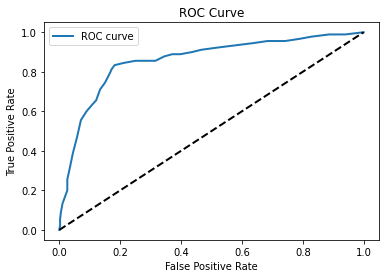

None

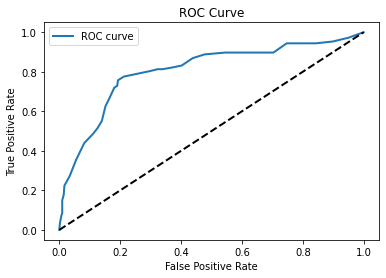

None

dev


,gmeans,bal,recall,pf,auc
0,0.825844,0.825718,0.833333,0.181579,0.857251


Training


,gmeans,bal,recall,pf,auc
0,0.80559,0.805472,0.797843,0.186587,0.873132


Test


,gmeans,bal,recall,pf,auc
0,0.781716,0.780677,0.757009,0.192771,0.804459


In [ ]:
result_dt_kc2 = rundt (data = data_kc2_load, 
                       sampling = 0.9698100448887399,
                       neighbors = 4,
                       smote = True, 
                       depth = 2)
print("dev")
display(result_dt_kc2[0])
print("Training")
display(result_dt_kc2[1])
print("Test")
display(result_dt_kc2[2])

### PC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=griddt,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.6589   |  7.313    |  1.042    |  0.9436   |
|  2        |  0.6948   |  7.715    |  3.361    |  0.8667   |
|  3        |  0.7281   |  1.432    |  2.918    |  0.9925   |
|  4        |  0.7547   |  5.492    |  9.315    |  0.9876   |
|  5        |  0.7414   |  3.233    |  3.741    |  0.8937   |
|  6        |  0.7624   |  6.154    |  1.847    |  0.9718   |
|  7        |  0.7508   |  5.436    |  9.509    |  0.8367   |
|  8        |  0.7046   |  7.125    |  9.943    |  0.9968   |
|  9        |  0.6567   |  8.765    |  9.504    |  0.92     |
|  10       |  0.7519   |  3.414    |  8.343    |  0.9586   |
|  11       |  0.7237   |  1.0      |  10.0     |  1.0      |
|  12       |  0.779    |  2.576    |  1.0      |  0.8      |
|  13       |  0.7045   |  1.0      |  1.0      |  1.0      |
|  14       |  0.8023   |  4.147    |  1.0      |  1.0      |
|  15   

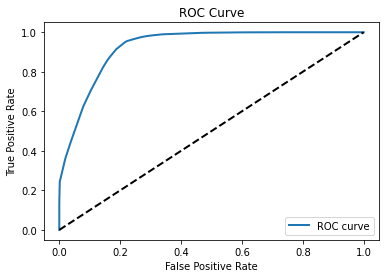

None

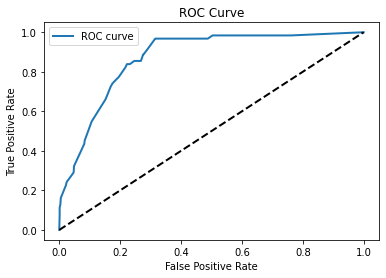

None

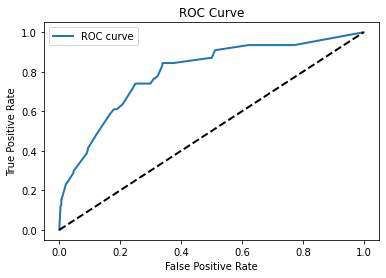

None

dev


,gmeans,bal,recall,pf,auc
0,0.802346,0.801586,0.822581,0.217391,0.871435


Training


,gmeans,bal,recall,pf,auc
0,0.862837,0.842377,0.951515,0.217576,0.926732


Test


,gmeans,bal,recall,pf,auc
0,0.736638,0.73601,0.714286,0.24031,0.794901


In [ ]:
result_dt_pc1 = rundt (data = data_pc1_load, 
                       sampling =1,
                       neighbors = 1,
                       smote = True, 
                       depth = 4.1474362417541535, fold = 5)
print("dev")
display(result_dt_pc1[0])
print("Training")
display(result_dt_pc1[1])
print("Test")
display(result_dt_pc1[2])

### PC4

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=griddt,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.8136   |  1.094    |  5.737    |  0.9717   |
|  2        |  0.7997   |  2.779    |  5.354    |  0.9381   |
|  3        |  0.7977   |  4.163    |  1.67     |  0.935    |
|  4        |  0.8136   |  1.064    |  4.322    |  0.9222   |
|  5        |  0.7628   |  8.907    |  1.236    |  0.8819   |
|  6        |  0.7973   |  1.608    |  4.222    |  0.9297   |
|  7        |  0.7839   |  2.314    |  8.132    |  0.9521   |
|  8        |  0.8212   |  5.217    |  9.322    |  0.8979   |
|  9        |  0.7953   |  9.189    |  7.431    |  0.9147   |
|  10       |  0.7956   |  3.648    |  3.771    |  0.9952   |
|  11       |  0.7567   |  10.0     |  10.0     |  0.8      |
|  12       |  0.8136   |  1.016    |  1.118    |  0.9291   |
|  13       |  0.8068   |  6.791    |  5.317    |  0.8002   |
|  14       |  0.8031   |  6.53     |  8.154    |  1.0      |
|  15   

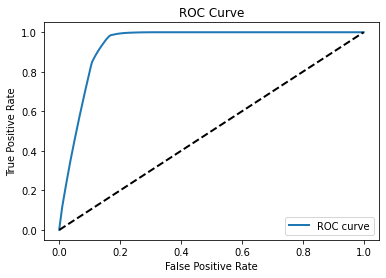

None

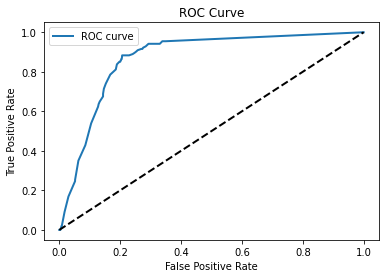

None

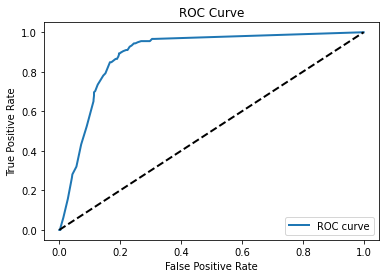

None

dev


,gmeans,bal,recall,pf,auc
0,0.824842,0.823395,0.850649,0.200182,0.869137


Training


,gmeans,bal,recall,pf,auc
0,0.905284,0.883044,0.980616,0.164261,0.937548


Test


,gmeans,bal,recall,pf,auc
0,0.837211,0.835349,0.865169,0.189844,0.888847


In [ ]:
result_dt_pc4 = rundt (data = data_pc4_load, 
                       sampling =0.9572527407764807,
                       neighbors = 10,
                       smote = True, 
                       depth = 3.7527076809671573, fold = 7)
print("dev")
display(result_dt_pc4[0])
print("Training")
display(result_dt_pc4[1])
print("Test")
display(result_dt_pc4[2])

### PC3

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'depth': (1, 10),
           'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=griddt,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   depth   | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.612    |  9.004    |  6.839    |  0.8935   |
|  2        |  0.6286   |  8.655    |  6.137    |  0.8275   |
|  3        |  0.6453   |  9.749    |  5.314    |  0.9934   |
|  4        |  0.6943   |  1.353    |  4.838    |  0.801    |
|  5        |  0.6222   |  9.701    |  4.193    |  0.974    |
|  6        |  0.6868   |  8.497    |  7.615    |  0.913    |
|  7        |  0.682    |  4.676    |  3.669    |  0.9783   |
|  8        |  0.6417   |  7.702    |  7.301    |  0.9462   |
|  9        |  0.6899   |  6.625    |  6.309    |  0.9051   |
|  10       |  0.6078   |  8.732    |  3.705    |  0.9027   |
|  11       |  0.6937   |  1.0      |  10.0     |  0.8      |
|  12       |  0.6785   |  1.0      |  1.0      |  0.8      |
|  13       |  0.6674   |  10.0     |  10.0     |  0.8      |
|  14       |  0.7309   |  4.92     |  10.0     |  0.8      |
|  15   

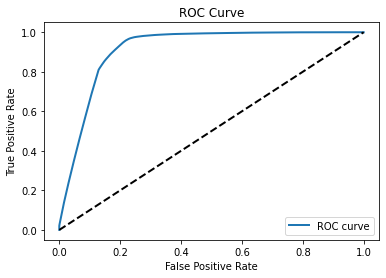

None

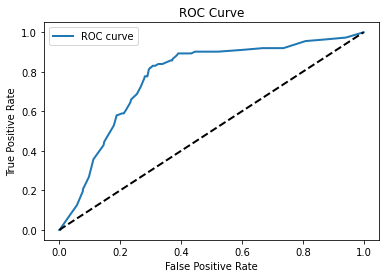

None

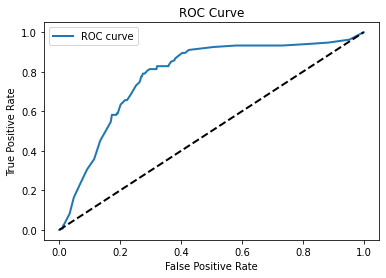

None

dev


,gmeans,bal,recall,pf,auc
0,0.743595,0.742249,0.776786,0.288177,0.770331


Training


,gmeans,bal,recall,pf,auc
0,0.865471,0.843043,0.957744,0.217912,0.913722


Test


,gmeans,bal,recall,pf,auc
0,0.75304,0.752337,0.776119,0.269353,0.782977


In [ ]:
result_dt_pc3 = rundt (data = data_pc3_load, 
                       sampling =0.992268091731286,
                       neighbors = 9.981287586195087,
                       smote = True, 
                       depth = 4.03731933053651, fold = 7)
print("dev")
display(result_dt_pc3[0])
print("Training")
display(result_dt_pc3[1])
print("Test")
display(result_dt_pc3[2])

## Naive Bayes

In [ ]:
!pip install scikit-optimize
from skopt import space
from skopt.utils import use_named_args
from skopt import gp_minimize

In [ ]:
def runnb (data = data_kc2_load, 
              sampling = 1,
              neighbors = 5,
              smote = True,
           fold = 10):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  tn_train = 0; fp_train = 0; fn_train = 0; tp_train = 0
  tn_dev = 0; fp_dev = 0; fn_dev = 0; tp_dev = 0
  tn_test = 0; fp_test = 0; fn_test = 0; tp_test = 0

  
  y_true_train, y_true_dev, y_true_test, Y_pred_train, Y_pred_dev, Y_pred_test  = [], [], [], [], [], []
  gmins = []
  # depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)

  for remainder, test in fold_generator():
      repro()
      fold_i += 1

      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train)


      model = modelnb
      model.fit(X_train, y_train)

      Y_pred_train_temp = model.predict_proba(X_train)
      Y_pred_test_temp = model.predict_proba(X_test)
      Y_pred_dev_temp = model.predict_proba(X_dev)

      # Y_pred_train_temp , Y_pred_test_temp, Y_pred_dev_temp = Y_pred_train_temp.round(), Y_pred_test_temp.round(), Y_pred_dev_temp.round()


      y_true_dev = np.append(y_true_dev, y_dev)
      Y_pred_dev = np.append(Y_pred_dev, Y_pred_dev_temp[:,1])

      y_true_train = np.append(y_true_train, y_train)
      Y_pred_train = np.append(Y_pred_train, Y_pred_train_temp[:,1])

      y_true_test = np.append(y_true_test, y_test)
      Y_pred_test = np.append(Y_pred_test, Y_pred_test_temp[:,1])
  # print(len(y_true_dev));print(len(Y_pred_dev))
  result_train = eval(y_true_train, Y_pred_train)
  result_dev = eval(y_true_dev, Y_pred_dev)
  result_test = eval(y_true_test, Y_pred_test)

  return result_dev[0], result_train[0], result_test[0]

In [ ]:
data = 

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from numpy import mean
# generate 2d classification dataset

X, y = make_blobs(n_samples=500, centers=3, n_features=2)
# define the model
# model = KNeighborsClassifier()
# define the space of hyperparameters to search
search_space = [Integer(1, 5, name='n'), Integer(1, 2, name='p')]
 
# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(n = 5, p=2):
    # something
    model = KNeighborsClassifier(n_neighbors=n, p=p)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
    eval = {'n': [n], 'p': [p]}
    df = pd.DataFrame(eval, columns = ['n','p'])
    display(df)
    estimate = mean(result)
    return 1.0 - estimate
 
# perform optimization
result = gp_minimize(evaluate_model, search_space, n_calls=10)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

In [ ]:

def gridnb(data = data_pc1_load, 
           sampling = 1,
           neighbors = 5,
           smote = True,
           fold = 10):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  
  tn = 0; fp = 0; fn = 0; tp = 0
  result = []
  
  # depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  for remainder, test in fold_generator():
      repro()
      fold_i += 1
    
      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    

      model = modelnb
      model.fit(X_train, y_train)
      Y_pred_dev_temp = model.predict(X_dev)
      Y_pred_dev_temp = Y_pred_dev_temp.round()
      # result.append(gmeans(y_test=y_dev, Y_pred=Y_pred_dev_temp))

      tn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][0].ravel()
      fp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][1].ravel()
      fn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][0].ravel()
      tp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][1].ravel()

  pf = fp/(fp+tn)
  pd = tp/(tp+fn)

  gmeans = math.sqrt(pd*(1-pf))
  return 1.0 - gmeans

### KC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridnb,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   | neighbors | sampling  |
-------------------------------------------------
|  1        |  0.6157   |  9.515    |  0.8211   |
|  2        |  0.6189   |  2.359    |  0.8392   |
|  3        |  0.607    |  3.712    |  0.9223   |
|  4        |  0.6203   |  8.282    |  0.8727   |
|  5        |  0.6191   |  7.346    |  0.8654   |
|  6        |  0.6115   |  3.052    |  0.9926   |
|  7        |  0.6089   |  6.299    |  0.8399   |
|  8        |  0.6092   |  6.378    |  0.8763   |
|  9        |  0.6176   |  7.787    |  0.903    |
|  10       |  0.6068   |  3.19     |  0.8164   |
|  11       |  0.6094   |  1.002    |  0.9724   |
|  12       |  0.6182   |  1.893    |  0.9985   |
|  13       |  0.6178   |  8.091    |  0.8002   |
|  14       |  0.6176   |  10.0     |  1.0      |
|  15       |  0.623    |  8.851    |  0.999    |
|  16       |  0.623    |  8.528    |  0.9997   |
|  17       |  0.623    |  8.85     |  0.9999   |
|  18       |  0.6199   |  8.099    |  0.9985   |


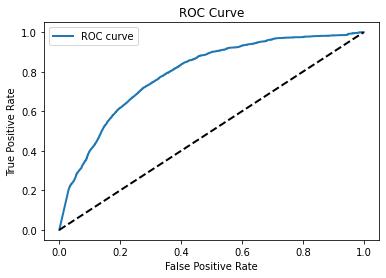

None

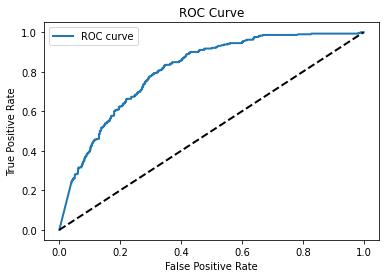

None

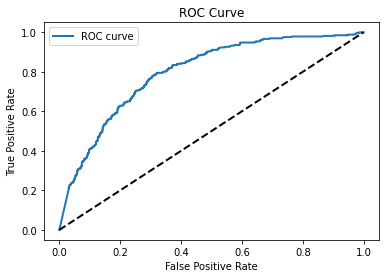

None

dev


,gmeans,bal,recall,pf,auc
0,0.629667,0.600778,0.446735,0.112492,0.806509


Training


,gmeans,bal,recall,pf,auc
0,0.604329,0.574659,0.407492,0.103754,0.790404


Test


,gmeans,bal,recall,pf,auc
0,0.606955,0.577131,0.411043,0.103758,0.795918


In [ ]:
result_nb_kc1 = runnb(data_kc1_load, neighbors=9, sampling= 0.9971996139035086)

print("dev")
display(result_nb_kc1[0])
print("Training")
display(result_nb_kc1[1])
print("Test")
display(result_nb_kc1[2])

### JM1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridnb,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   | neighbors | sampling  |
-------------------------------------------------
|  1        |  0.4635   |  2.273    |  0.9531   |
|  2        |  0.4662   |  4.853    |  0.919    |
|  3        |  0.4538   |  1.162    |  0.8177   |
|  4        |  0.4552   |  6.288    |  0.8192   |
|  5        |  0.4574   |  6.647    |  0.9048   |
|  6        |  0.4537   |  3.067    |  0.924    |
|  7        |  0.4574   |  8.557    |  0.9329   |
|  8        |  0.4646   |  1.971    |  0.9579   |
|  9        |  0.4625   |  9.089    |  0.9879   |
|  10       |  0.4626   |  9.099    |  0.9829   |
|  11       |  0.4572   |  9.994    |  0.8019   |
|  12       |  0.4518   |  1.0      |  1.0      |
|  13       |  0.4568   |  9.995    |  0.9983   |
|  14       |  0.4603   |  5.574    |  0.9963   |
|  15       |  0.4692   |  4.418    |  0.9988   |
|  16       |  0.4696   |  4.67     |  0.9996   |
|  17       |  0.4698   |  4.581    |  0.9987   |
|  18       |  0.4656   |  4.405    |  0.9995   |


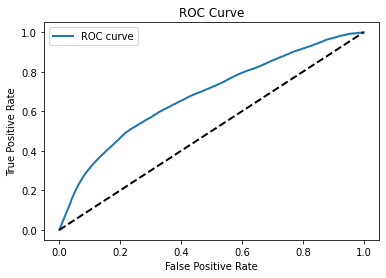

None

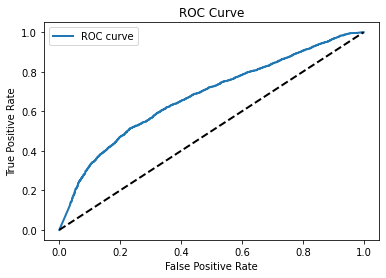

None

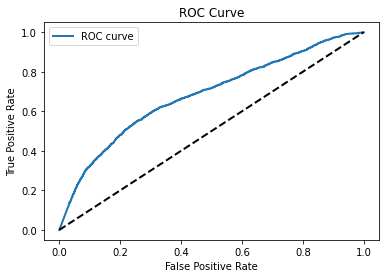

None

dev


,gmeans,bal,recall,pf,auc
0,0.471758,0.458936,0.237368,0.062405,0.676412


Training


,gmeans,bal,recall,pf,auc
0,0.449515,0.443109,0.214609,0.058459,0.679609


Test


,gmeans,bal,recall,pf,auc
0,0.462472,0.452023,0.227294,0.059018,0.68167


In [ ]:
result_nb_jm1 = runnb(data_jm1_load, neighbors=5, sampling=0.9970078427837763)

print("dev")
display(result_nb_jm1[0])
print("Training")
display(result_nb_jm1[1])
print("Test")
display(result_nb_jm1[2])

### KC2

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridnb,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   | neighbors | sampling  |
-------------------------------------------------
|  1        |  0.7054   |  4.303    |  0.9151   |
|  2        |  0.6878   |  7.658    |  0.8537   |
|  3        |  0.687    |  9.251    |  0.8761   |
|  4        |  0.7082   |  2.305    |  0.9239   |
|  5        |  0.6867   |  7.84     |  0.979    |
|  6        |  0.6977   |  4.681    |  0.9066   |
|  7        |  0.6973   |  5.739    |  0.9673   |
|  8        |  0.6958   |  5.83     |  0.8249   |
|  9        |  0.7044   |  4.534    |  0.8258   |
|  10       |  0.6874   |  9.1      |  0.8082   |
|  11       |  0.6882   |  1.003    |  0.8045   |
|  12       |  0.6992   |  2.884    |  0.8002   |
|  13       |  0.6874   |  10.0     |  0.8125   |
|  14       |  0.6954   |  1.063    |  1.0      |
|  15       |  0.7123   |  1.75     |  0.9997   |
|  16       |  0.7076   |  1.9      |  0.804    |
|  17       |  0.7123   |  2.011    |  0.9994   |
|  18       |  0.7123   |  1.906    |  0.9996   |


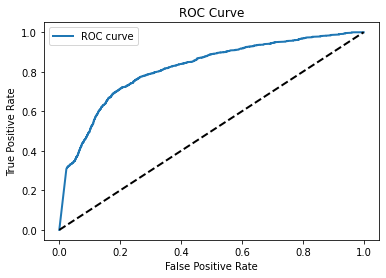

None

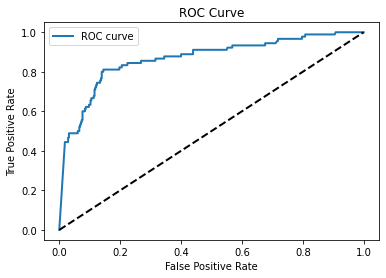

None

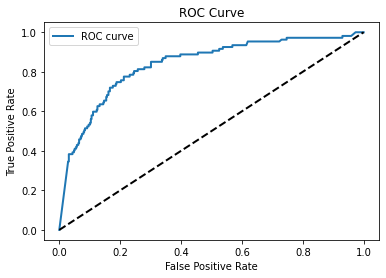

None

dev


,gmeans,bal,recall,pf,auc
0,0.697489,0.658713,0.522222,0.068421,0.86655


Training


,gmeans,bal,recall,pf,auc
0,0.627729,0.59007,0.424813,0.072429,0.816849


Test


,gmeans,bal,recall,pf,auc
0,0.664102,0.626175,0.476636,0.074699,0.837935


In [ ]:
result_nb_kc2 = runnb(data_kc2_load, neighbors=2, sampling=0.9971114864965173, fold = 10)

print("dev")
display(result_nb_kc2[0])
print("Training")
display(result_nb_kc2[1])
print("Test")
display(result_nb_kc2[2])

### PC4

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridnb,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   | neighbors | sampling  |
-------------------------------------------------
|  1        |  0.7032   |  4.389    |  0.9987   |
|  2        |  0.7021   |  3.551    |  0.9072   |
|  3        |  0.6998   |  8.748    |  0.9672   |
|  4        |  0.6881   |  8.697    |  0.9338   |
|  5        |  0.6985   |  4.571    |  0.8364   |
|  6        |  0.6962   |  5.685    |  0.9247   |
|  7        |  0.6907   |  8.507    |  0.9534   |
|  8        |  0.6968   |  4.158    |  0.8107   |
|  9        |  0.6928   |  8.614    |  0.9408   |
|  10       |  0.6893   |  1.256    |  0.9087   |
|  11       |  0.6866   |  10.0     |  1.0      |
|  12       |  0.705    |  2.277    |  0.8002   |
|  13       |  0.7123   |  2.301    |  0.9994   |
|  14       |  0.6947   |  2.698    |  0.9995   |
|  15       |  0.6879   |  6.957    |  1.0      |
|  16       |  0.7119   |  1.799    |  0.9956   |
|  17       |  0.6968   |  5.164    |  0.9995   |
|  18       |  0.6996   |  9.275    |  1.0      |


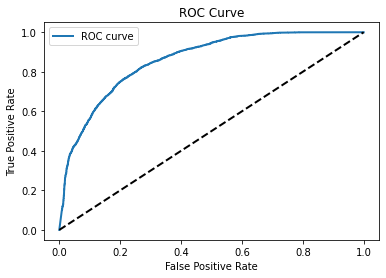

None

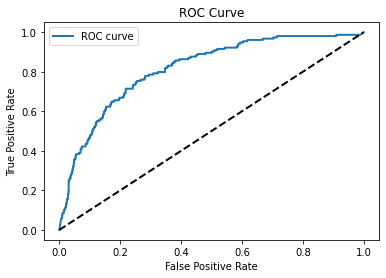

None

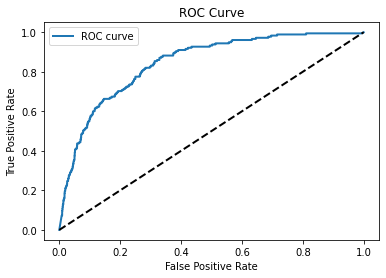

None

dev


,gmeans,bal,recall,pf,auc
0,0.731249,0.722407,0.649351,0.176524,0.814415


Training


,gmeans,bal,recall,pf,auc
0,0.764718,0.760013,0.710061,0.176417,0.859975


Test


,gmeans,bal,recall,pf,auc
0,0.743653,0.736883,0.674157,0.179688,0.844926


In [ ]:
result_nb_pc4 = runnb(data_pc4_load, neighbors=2, sampling=0.9974310638718621, fold = 7)

print("dev")
display(result_nb_pc4[0])
print("Training")
display(result_nb_pc4[1])
print("Test")
display(result_nb_pc4[2])

### PC3

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridnb,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   | neighbors | sampling  |
-------------------------------------------------
|  1        |  0.4595   |  8.747    |  0.9705   |
|  2        |  0.4392   |  2.561    |  0.8925   |
|  3        |  0.4439   |  7.058    |  0.9432   |
|  4        |  0.4272   |  4.545    |  0.9813   |
|  5        |  0.4548   |  9.687    |  0.9696   |
|  6        |  0.439    |  5.775    |  0.8928   |
|  7        |  0.4429   |  6.588    |  0.8175   |
|  8        |  0.4489   |  8.738    |  0.9218   |
|  9        |  0.4427   |  6.724    |  0.9843   |
|  10       |  0.4441   |  9.339    |  0.9019   |
|  11       |  0.4054   |  1.0      |  0.8      |
|  12       |  0.4441   |  3.55     |  0.8009   |
|  13       |  0.4629   |  9.196    |  0.9986   |
|  14       |  0.4595   |  10.0     |  1.0      |
|  15       |  0.4463   |  8.352    |  0.9994   |
|  16       |  0.4349   |  1.981    |  0.8      |
|  17       |  0.4629   |  8.989    |  1.0      |
|  18       |  0.4629   |  9.05     |  0.9986   |


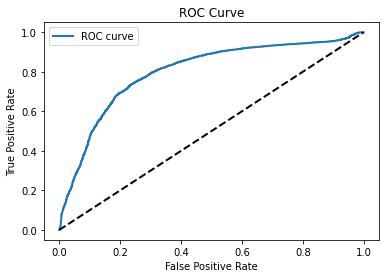

None

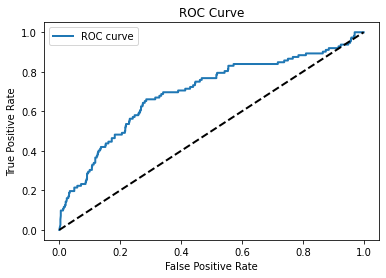

None

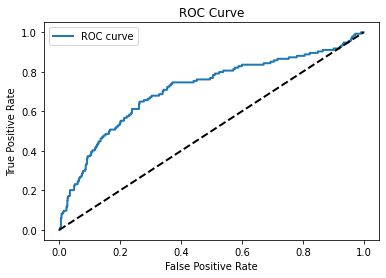

None

dev


,gmeans,bal,recall,pf,auc
0,0.46291,0.460135,0.857143,0.75,0.697869


Training


,gmeans,bal,recall,pf,auc
0,0.483018,0.46683,0.939037,0.751548,0.798896


Test


,gmeans,bal,recall,pf,auc
0,0.453379,0.451968,0.873134,0.764581,0.71239


In [ ]:
result_nb_pc3 = runnb(data_pc3_load, neighbors=9.196176186424076, sampling=0.9985682519099137, fold = 7)

print("dev")
display(result_nb_pc3[0])
print("Training")
display(result_nb_pc3[1])
print("Test")
display(result_nb_pc3[2])

### PC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridnb,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   | neighbors | sampling  |
-------------------------------------------------
|  1        |  0.5576   |  4.513    |  0.9976   |
|  2        |  0.5557   |  7.81     |  0.8832   |
|  3        |  0.5568   |  7.427    |  0.868    |
|  4        |  0.5601   |  2.399    |  0.961    |
|  5        |  0.559    |  6.453    |  0.8453   |
|  6        |  0.5554   |  7.928    |  0.835    |
|  7        |  0.5554   |  9.374    |  0.8498   |
|  8        |  0.5583   |  5.88     |  0.8376   |
|  9        |  0.5572   |  7.383    |  0.9641   |
|  10       |  0.5579   |  8.38     |  0.873    |
|  11       |  0.5601   |  1.001    |  0.8032   |
|  12       |  0.5594   |  1.003    |  0.8021   |
|  13       |  0.5598   |  1.0      |  0.9562   |
|  14       |  0.5587   |  1.007    |  0.9889   |
|  15       |  0.5605   |  1.004    |  0.8219   |
|  16       |  0.5594   |  1.002    |  0.811    |
|  17       |  0.5601   |  1.0      |  0.9958   |
|  18       |  0.5601   |  1.002    |  0.8188   |


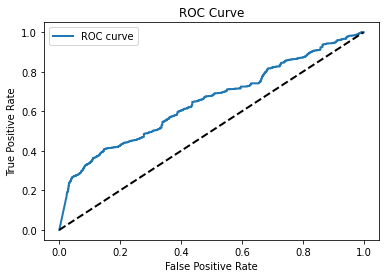

None

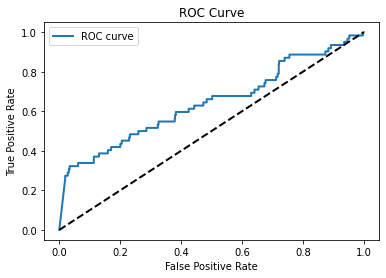

None

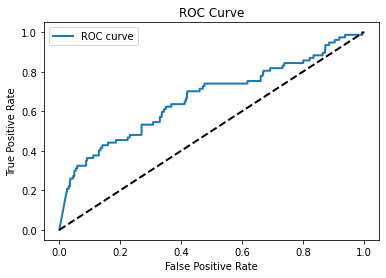

None

dev


,gmeans,bal,recall,pf,auc
0,0.560869,0.52969,0.33871,0.071256,0.643174


Training


,gmeans,bal,recall,pf,auc
0,0.546159,0.519855,0.326486,0.086364,0.648766


Test


,gmeans,bal,recall,pf,auc
0,0.545545,0.518851,0.324675,0.083333,0.667025


In [ ]:
result_nb_pc1 = runnb(data_pc1_load, neighbors=1, sampling=0.8418457303507866, fold = 5)

print("dev")
display(result_nb_pc1[0])
print("Training")
display(result_nb_pc1[1])
print("Test")
display(result_nb_pc1[2])

## Logistic Regression

In [ ]:
def runlr (data = data_pc3_load, 
              sampling = 1,
              neighbors = 5,
              smote = True,
              c = 2,
           fold = 10):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  tn_train = 0; fp_train = 0; fn_train = 0; tp_train = 0
  tn_dev = 0; fp_dev = 0; fn_dev = 0; tp_dev = 0
  tn_test = 0; fp_test = 0; fn_test = 0; tp_test = 0

  
  y_true_train, y_true_dev, y_true_test, Y_pred_train, Y_pred_dev, Y_pred_test  = [], [], [], [], [], []
  gmins = []
  # depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)

  for remainder, test in fold_generator():
      repro()
      fold_i += 1

      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train)


      model = LogisticRegression(C=c)
      model.fit(X_train, y_train)

      Y_pred_train_temp = model.predict_proba(X_train)
      Y_pred_test_temp = model.predict_proba(X_test)
      Y_pred_dev_temp = model.predict_proba(X_dev)

      # Y_pred_train_temp , Y_pred_test_temp, Y_pred_dev_temp = Y_pred_train_temp.round(), Y_pred_test_temp.round(), Y_pred_dev_temp.round()


      y_true_dev = np.append(y_true_dev, y_dev)
      Y_pred_dev = np.append(Y_pred_dev, Y_pred_dev_temp[:,1])

      y_true_train = np.append(y_true_train, y_train)
      Y_pred_train = np.append(Y_pred_train, Y_pred_train_temp[:,1])

      y_true_test = np.append(y_true_test, y_test)
      Y_pred_test = np.append(Y_pred_test, Y_pred_test_temp[:,1])
  # print(len(y_true_dev));print(len(Y_pred_dev))
  result_train = eval(y_true_train, Y_pred_train)
  result_dev = eval(y_true_dev, Y_pred_dev)
  result_test = eval(y_true_test, Y_pred_test)

  return result_dev[0], result_train[0], result_test[0]

In [ ]:

def gridlr(data = data_pc1_load, 
           sampling = 1,
           neighbors = 5,
           smote = True,
           c = 2, fold = 5):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  
  tn = 0; fp = 0; fn = 0; tp = 0
  result, result2 = [],[]
  
  # depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  for remainder, test in fold_generator():
      repro()
      fold_i += 1
    
      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    

      model = LogisticRegression(C=c)
      model.fit(X_train, y_train)
      Y_pred_dev_temp = model.predict_proba(X_dev)
      Y_pred_dev_temp1 = Y_pred_dev_temp[:,1].round()
      result.append(gmeans(y_dev, Y_pred_dev_temp1))
      result2.append(metrics.roc_auc_score(y_dev, Y_pred_dev_temp[:,1]))

      # tn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][0].ravel()
      # fp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][1].ravel()
      # fn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][0].ravel()
      # tp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][1].ravel()

  # pf = fp/(fp+tn)
  # pd = tp/(tp+fn)

  # gmeans = math.sqrt(pd*(1-pf))
  gmeans1 = sum(result)/len(result)
  auc1 = sum(result2)/len(result2)
  return gmeans1, auc1

### PC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'c': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridlr,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |     c     | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.6085   |  1.486    |  9.271    |  0.8688   |
|  2        |  0.6671   |  6.601    |  7.019    |  0.9574   |
|  3        |  0.6477   |  2.409    |  1.742    |  0.9935   |
|  4        |  0.653    |  2.873    |  7.832    |  0.9608   |
|  5        |  0.6297   |  4.273    |  1.499    |  0.8024   |
|  6        |  0.6641   |  8.032    |  3.512    |  0.9201   |
|  7        |  0.6572   |  5.386    |  7.776    |  0.8819   |
|  8        |  0.6297   |  4.533    |  1.205    |  0.8175   |
|  9        |  0.7108   |  9.601    |  1.798    |  0.9711   |
|  10       |  0.6656   |  8.639    |  4.043    |  0.9091   |
|  11       |  0.7348   |  9.865    |  9.991    |  0.9885   |
|  12       |  0.7097   |  10.0     |  1.0      |  1.0      |
|  13       |  0.6728   |  9.999    |  8.26     |  0.9788   |
|  14       |  0.7255   |  7.686    |  10.0     |  1.0      |
|  15   

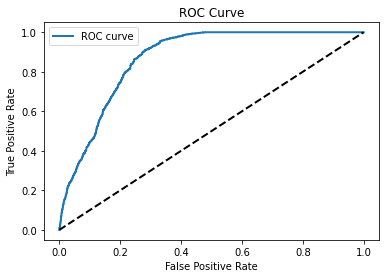

None

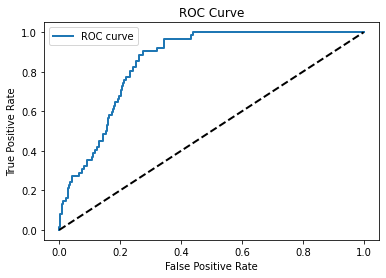

None

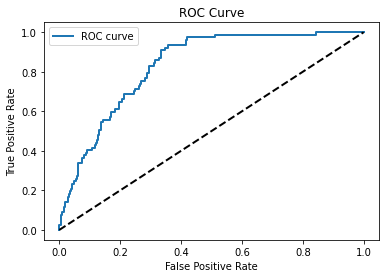

None

dev


,gmeans,bal,recall,pf,auc
0,0.75098,0.748563,0.709677,0.205314,0.850534


Training


,gmeans,bal,recall,pf,auc
0,0.759269,0.755206,0.707481,0.185152,0.867976


Test


,gmeans,bal,recall,pf,auc
0,0.720925,0.714693,0.649351,0.199612,0.831534


In [ ]:
result_lr_pc1 = runlr(data_pc1_load, neighbors=9.877767839546168, sampling=0.9925124144868519, c = 9.779952718055897, fold = 5)

print("dev")
display(result_lr_pc1[0])
print("Training")
display(result_lr_pc1[1])
print("Test")
display(result_lr_pc1[2])

### PC4

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'c': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridlr,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |     c     | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.8249   |  1.715    |  5.321    |  0.8146   |
|  2        |  0.8292   |  8.891    |  9.114    |  0.8592   |
|  3        |  0.8265   |  6.29     |  3.418    |  0.8214   |
|  4        |  0.8287   |  3.688    |  3.618    |  0.9695   |
|  5        |  0.8429   |  2.037    |  2.674    |  0.8353   |
|  6        |  0.8355   |  8.949    |  5.352    |  0.9024   |
|  7        |  0.8129   |  9.601    |  4.293    |  0.8026   |
|  8        |  0.835    |  5.771    |  2.545    |  0.9414   |
|  9        |  0.8294   |  8.737    |  1.614    |  0.8922   |
|  10       |  0.8137   |  1.616    |  4.251    |  0.8053   |
|  11       |  0.8195   |  1.0      |  10.0     |  1.0      |
|  12       |  0.8245   |  1.039    |  1.017    |  0.95     |
|  13       |  0.8181   |  4.762    |  10.0     |  0.8      |
|  14       |  0.8241   |  3.991    |  1.0      |  0.8      |
|  15   

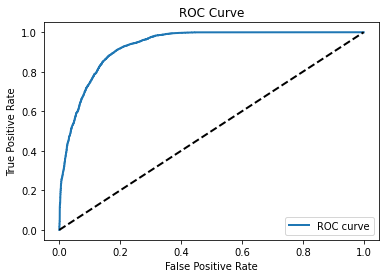

None

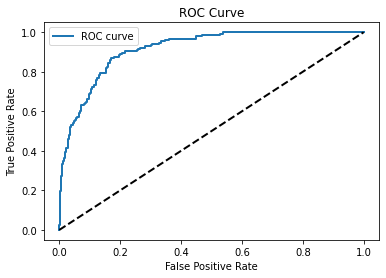

None

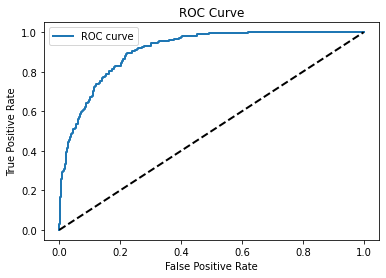

None

dev


,gmeans,bal,recall,pf,auc
0,0.843846,0.843392,0.857143,0.169245,0.915407


Training


,gmeans,bal,recall,pf,auc
0,0.859002,0.853252,0.904624,0.184318,0.930917


Test


,gmeans,bal,recall,pf,auc
0,0.822321,0.822139,0.831461,0.186719,0.909028


In [ ]:
result_lr_pc4 = runlr(data_pc4_load, neighbors=5.421405293920621, sampling=0.9960838697795984, c = 8.11390538444785, fold = 7)

print("dev")
display(result_lr_pc4[0])
print("Training")
display(result_lr_pc4[1])
print("Test")
display(result_lr_pc4[2])

### PC3

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'c': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridlr,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |     c     | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.7023   |  7.145    |  8.636    |  0.9982   |
|  2        |  0.7065   |  7.965    |  1.816    |  0.9009   |
|  3        |  0.7145   |  1.683    |  3.068    |  0.8059   |
|  4        |  0.7059   |  1.31     |  5.86     |  0.9195   |
|  5        |  0.7086   |  5.129    |  7.616    |  0.9261   |
|  6        |  0.7077   |  8.837    |  4.318    |  0.9185   |
|  7        |  0.7092   |  4.126    |  8.164    |  0.9261   |
|  8        |  0.6976   |  4.485    |  8.192    |  0.816    |
|  9        |  0.7068   |  1.8      |  5.884    |  0.8652   |
|  10       |  0.7005   |  7.069    |  1.351    |  0.8097   |
|  11       |  0.7067   |  1.027    |  1.002    |  0.9467   |
|  12       |  0.7106   |  3.998    |  3.328    |  0.9998   |
|  13       |  0.7119   |  9.943    |  1.095    |  0.9649   |
|  14       |  0.711    |  9.909    |  9.993    |  0.9268   |
|  15   

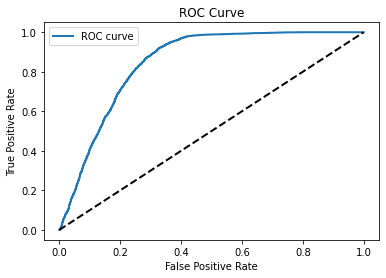

None

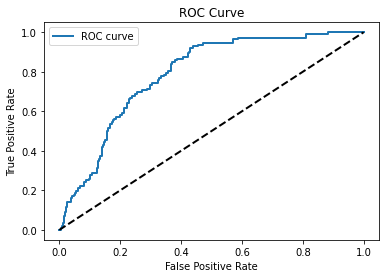

None

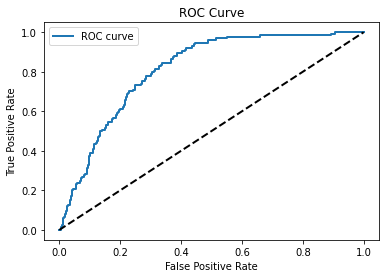

None

dev


,gmeans,bal,recall,pf,auc
0,0.71689,0.715928,0.6875,0.252463,0.787342


Training


,gmeans,bal,recall,pf,auc
0,0.762807,0.762127,0.741458,0.215229,0.846468


Test


,gmeans,bal,recall,pf,auc
0,0.729033,0.726815,0.686567,0.225875,0.81041


In [ ]:
result_lr_pc3 = runlr(data_pc3_load, neighbors=9.080462194012169, sampling=0.8098266631419415, c =1.12938232522859, fold = 7)

print("dev")
display(result_lr_pc3[0])
print("Training")
display(result_lr_pc3[1])
print("Test")
display(result_lr_pc3[2])

### KC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'c': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridlr,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |     c     | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.7235   |  1.143    |  3.274    |  0.928    |
|  2        |  0.7234   |  6.958    |  8.92     |  0.8106   |
|  3        |  0.7213   |  6.62     |  8.56     |  0.8425   |
|  4        |  0.7207   |  8.992    |  8.799    |  0.8557   |
|  5        |  0.7201   |  5.826    |  8.137    |  0.8651   |
|  6        |  0.7315   |  8.581    |  3.902    |  0.9617   |
|  7        |  0.7201   |  3.951    |  6.379    |  0.8401   |
|  8        |  0.7308   |  9.287    |  2.691    |  0.935    |
|  9        |  0.7263   |  5.04     |  9.985    |  0.8937   |
|  10       |  0.7194   |  2.833    |  3.593    |  0.8715   |
|  11       |  0.7213   |  1.023    |  9.962    |  0.9258   |
|  12       |  0.7111   |  1.0      |  1.0      |  0.8      |
|  13       |  0.7257   |  9.978    |  4.196    |  0.8357   |
|  14       |  0.7289   |  9.97     |  1.511    |  0.9987   |
|  15   

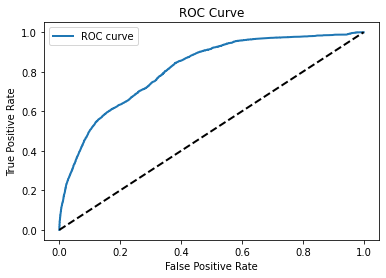

None

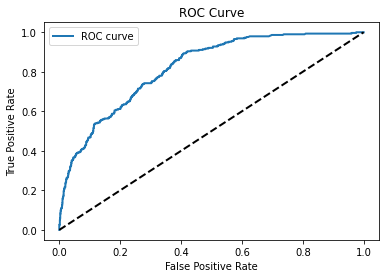

None

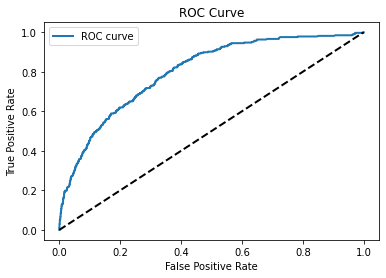

None

dev


,gmeans,bal,recall,pf,auc
0,0.731529,0.731395,0.742268,0.279055,0.819171


Training


,gmeans,bal,recall,pf,auc
0,0.717359,0.716218,0.685473,0.249273,0.813606


Test


,gmeans,bal,recall,pf,auc
0,0.712718,0.711623,0.680982,0.254066,0.799671


In [ ]:
result_lr_kc1 = runlr(data_kc1_load, neighbors=3.902366763160168, sampling=0.9617394713880929, c =8.58105056289731, fold = 10)

print("dev")
display(result_lr_kc1[0])
print("Training")
display(result_lr_kc1[1])
print("Test")
display(result_lr_kc1[2])

### KC2

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'c': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridlr,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |     c     | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.8098   |  2.626    |  1.587    |  0.9581   |
|  2        |  0.8125   |  4.161    |  1.399    |  0.9758   |
|  3        |  0.8043   |  8.98     |  4.843    |  0.9691   |
|  4        |  0.8098   |  3.155    |  9.058    |  0.9798   |
|  5        |  0.8111   |  2.954    |  6.908    |  0.9887   |
|  6        |  0.8097   |  3.763    |  5.187    |  0.8844   |
|  7        |  0.819    |  1.817    |  9.107    |  0.8059   |
|  8        |  0.8137   |  2.974    |  5.986    |  0.8287   |
|  9        |  0.8232   |  1.83     |  4.286    |  0.9883   |
|  10       |  0.8138   |  3.095    |  2.351    |  0.9137   |
|  11       |  0.819    |  9.977    |  1.031    |  0.8417   |
|  12       |  0.8057   |  9.959    |  9.989    |  0.9239   |
|  13       |  0.8246   |  1.119    |  9.9      |  0.9491   |
|  14       |  0.8177   |  1.013    |  6.085    |  0.8353   |
|  15   

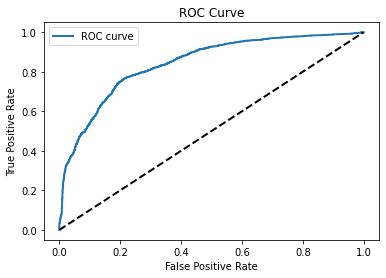

None

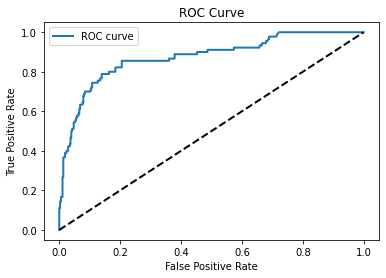

None

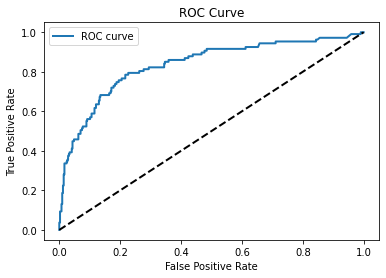

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.824586,0.822522,0.855556,0.205263,0.874152,0.628571


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.77518,0.774909,0.762205,0.211624,0.841806,0.767645


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.782882,0.782874,0.785047,0.219277,0.835007,0.595745


In [ ]:
result_lr_kc2 = runlr(data_kc2_load, neighbors=9.899571294675328, sampling=0.9491002873821484, c =1.1185582276493, fold = 10)

print("dev")
display(result_lr_kc2[0])
print("Training")
display(result_lr_kc2[1])
print("Test")
display(result_lr_kc2[2])

### JM1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'c': (1,10)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridlr,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |     c     | neighbors | sampling  |
-------------------------------------------------------------
|  1        |  0.6216   |  9.611    |  4.547    |  0.865    |
|  2        |  0.647    |  1.975    |  9.334    |  0.9857   |
|  3        |  0.6288   |  2.71     |  6.554    |  0.9001   |
|  4        |  0.647    |  6.868    |  1.477    |  0.9721   |
|  5        |  0.6118   |  5.339    |  8.799    |  0.8402   |
|  6        |  0.6148   |  6.768    |  7.087    |  0.8498   |
|  7        |  0.6229   |  2.918    |  6.174    |  0.8852   |
|  8        |  0.6144   |  6.66     |  7.762    |  0.8493   |
|  9        |  0.6451   |  6.143    |  5.253    |  0.9587   |
|  10       |  0.607    |  6.078    |  8.387    |  0.8238   |
|  11       |  0.6461   |  1.0      |  1.0      |  1.0      |
|  12       |  0.6485   |  9.727    |  9.976    |  0.9635   |
|  13       |  0.6521   |  9.944    |  1.259    |  0.9992   |
|  14       |  0.6487   |  1.003    |  4.96     |  0.999    |
|  15   

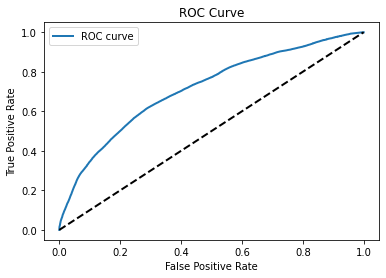

None

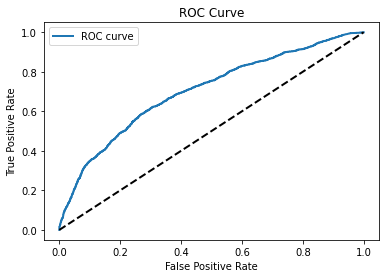

None

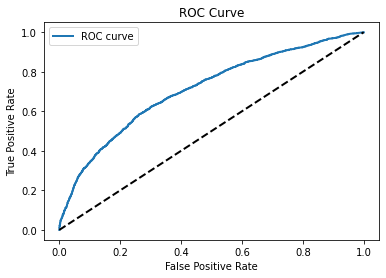

None

dev


,gmeans,bal,recall,pf,auc,f1 score
0,0.654622,0.651032,0.586316,0.269114,0.702013,0.433463


Training


,gmeans,bal,recall,pf,auc,f1 score
0,0.658547,0.655184,0.593207,0.268915,0.713749,0.637104


Test


,gmeans,bal,recall,pf,auc,f1 score
0,0.65631,0.652804,0.589158,0.268885,0.710233,0.434584


In [ ]:
result_lr_jm1 = runlr(data_jm1_load, neighbors=3, sampling=0.9998396734916772, c =7.3410296070478935, fold = 10)

print("dev")
display(result_lr_jm1[0])
print("Training")
display(result_lr_jm1[1])
print("Test")
display(result_lr_jm1[2])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def runknn (data = data_pc3_load, 
              sampling = 1,
              neighbors = 5,
              smote = True,
              n = 5,
              leaf = 30,
              fold = 10):
  repro()
  fold_generator = split(data, fold)
  fold_i = 0
  tn_train = 0; fp_train = 0; fn_train = 0; tp_train = 0
  tn_dev = 0; fp_dev = 0; fn_dev = 0; tp_dev = 0
  tn_test = 0; fp_test = 0; fn_test = 0; tp_test = 0

  
  y_true_train, y_true_dev, y_true_test, Y_pred_train, Y_pred_dev, Y_pred_test  = 0,0,0,0,0,0
  gmins = []
  # depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  n = int(np.round(n,0))
  leaf = int(np.round(leaf,0))
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)

  for remainder, test in fold_generator():
      repro()
      fold_i += 1

      train, dev = next(split(remainder, fold)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train)


      model = KNeighborsClassifier(leaf_size=leaf, n_neighbors=n)
      model.fit(X_train, y_train)

      Y_pred_train_temp = model.predict_proba(X_train)
      Y_pred_test_temp = model.predict_proba(X_test)
      Y_pred_dev_temp = model.predict_proba(X_dev)

      # Y_pred_train_temp , Y_pred_test_temp, Y_pred_dev_temp = Y_pred_train_temp.round(), Y_pred_test_temp.round(), Y_pred_dev_temp.round()


      y_true_dev = np.append(y_true_dev, y_dev)
      Y_pred_dev = np.append(Y_pred_dev, Y_pred_dev_temp[:,1])

      y_true_train = np.append(y_true_train, y_train)
      Y_pred_train = np.append(Y_pred_train, Y_pred_train_temp[:,1])

      y_true_test = np.append(y_true_test, y_test)
      Y_pred_test = np.append(Y_pred_test, Y_pred_test_temp[:,1])
  # print(len(y_true_dev));print(len(Y_pred_dev))
  result_train = eval(y_true_train, Y_pred_train)
  result_dev = eval(y_true_dev, Y_pred_dev)
  result_test = eval(y_true_test, Y_pred_test)

  return result_dev[0], result_train[0], result_test[0]

In [ ]:

def gridknn(data = data_pc1_load, 
           sampling = 1,
           neighbors = 5,
           smote = True,
           n = 5,
           leaf = 30):
  repro()
  fold_generator = split(data)
  fold_i = 0
  
  tn = 0; fp = 0; fn = 0; tp = 0
  result = []
  
  # depth = int(np.round(depth,0))
  # estimator = int(np.round(estimator,0))
  neighbors = int(np.round(neighbors,0))
  n = int(np.round(n,0))
  leaf = int(np.round(leaf,0))
  
  sm = SMOTE(random_state=42, sampling_strategy=sampling, k_neighbors=neighbors)
  for remainder, test in fold_generator():
      repro()
      fold_i += 1
    
      train, dev = next(split(remainder)())

      X_train, y_train = train[0], train[1]
      X_dev, y_dev = dev[0], dev[1]
      X_test, y_test = test[0],test[1]

      if smote == True:
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    

      model = KNeighborsClassifier(leaf_size=leaf, n_neighbors=n)
      model.fit(X_train, y_train)
      Y_pred_dev_temp = model.predict(X_dev)
      Y_pred_dev_temp = Y_pred_dev_temp.round()
      # result.append(gmeans(y_test=y_dev, Y_pred=Y_pred_dev_temp))

      tn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][0].ravel()
      fp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[0][1].ravel()
      fn += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][0].ravel()
      tp += confusion_matrix(y_dev, Y_pred_dev_temp, labels=[0,1])[1][1].ravel()

  pf = fp/(fp+tn)
  pd = tp/(tp+fn)

  gmeans = math.sqrt(pd*(1-pf))
  return gmeans

### KC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'n': (1,10),
           'leaf': (10,100)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridknn,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   leaf    |     n     | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.6627   |  80.4     |  2.239    |  9.24     |  0.8502   |
|  2        |  0.7119   |  84.45    |  9.472    |  8.08     |  0.9012   |
|  3        |  0.6888   |  69.66    |  1.074    |  8.021    |  0.9954   |
|  4        |  0.7032   |  37.91    |  7.916    |  5.881    |  0.8951   |
|  5        |  0.7206   |  51.96    |  7.154    |  1.5      |  0.9778   |
|  6        |  0.7149   |  21.68    |  9.747    |  2.205    |  0.8932   |
|  7        |  0.709    |  25.56    |  7.474    |  6.798    |  0.9546   |
|  8        |  0.7038   |  64.79    |  9.26     |  3.819    |  0.8522   |
|  9        |  0.6278   |  49.46    |  2.169    |  1.365    |  0.8369   |
|  10       |  0.671    |  53.21    |  1.487    |  2.31     |  0.8126   |
|  11       |  0.6623   |  100.0    |  1.0      |  1.0      |  1.0      |
|  12       |  0.7124   |  10.0     | 

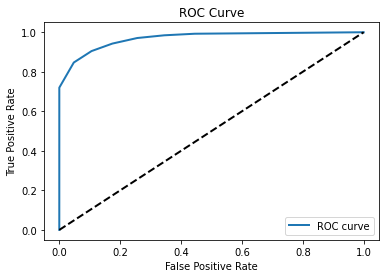

None

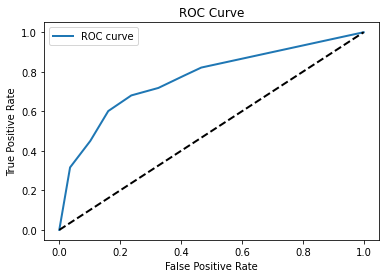

None

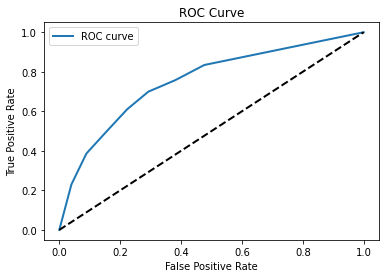

None

dev


,gmeans,bal,recall,pf,auc
0,0.720691,0.718808,0.680412,0.236646,0.767202


Training


,gmeans,bal,recall,pf,auc
0,0.882195,0.870193,0.942657,0.174389,0.96843


Test


,gmeans,bal,recall,pf,auc
0,0.688655,0.68256,0.610429,0.223094,0.752712


In [ ]:
result_knn_kc1 = runknn(data_kc1_load, neighbors=1.500482759551017, sampling=0.97780581749211, n =7.153908745857116, leaf = 51.96417909395408)

print("dev")
display(result_knn_kc1[0])
print("Training")
display(result_knn_kc1[1])
print("Test")
display(result_knn_kc1[2])

### KC2

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'n': (1,10),
           'leaf': (10,100)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridknn,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   leaf    |     n     | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.8026   |  67.48    |  9.314    |  4.9      |  0.8345   |
|  2        |  0.7497   |  42.49    |  2.838    |  9.082    |  0.8205   |
|  3        |  0.7647   |  99.01    |  3.451    |  8.524    |  0.9501   |
|  4        |  0.7895   |  54.78    |  8.949    |  1.935    |  0.9167   |
|  5        |  0.7659   |  17.36    |  5.527    |  2.877    |  0.9563   |
|  6        |  0.7821   |  65.17    |  8.12     |  1.238    |  0.8164   |
|  7        |  0.7551   |  46.69    |  3.658    |  1.299    |  0.8821   |
|  8        |  0.7292   |  90.64    |  4.258    |  7.119    |  0.8331   |
|  9        |  0.7484   |  45.25    |  5.902    |  8.5      |  0.8911   |
|  10       |  0.6775   |  96.33    |  2.013    |  4.316    |  0.871    |
|  11       |  0.7809   |  99.9     |  9.951    |  9.803    |  0.8028   |
|  12       |  0.7596   |  68.23    | 

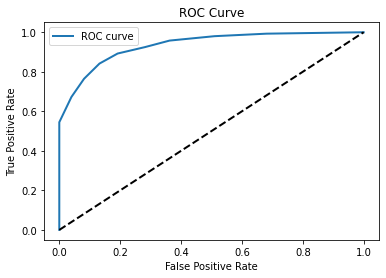

None

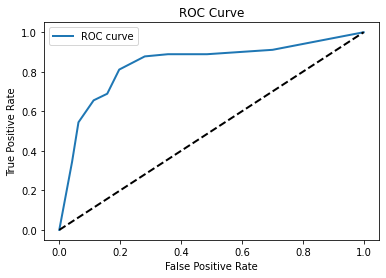

None

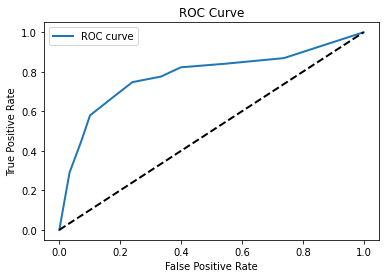

None

dev


,gmeans,bal,recall,pf,auc
0,0.807121,0.807089,0.811111,0.19685,0.838101


Training


,gmeans,bal,recall,pf,auc
0,0.849307,0.844577,0.892281,0.191597,0.933804


Test


,gmeans,bal,recall,pf,auc
0,0.753616,0.753567,0.747664,0.240385,0.780969


In [ ]:
result_knn_kc2 = runknn(data_kc2_load, neighbors=1.4337338079841806, sampling=0.8693955623538545, n =9.269376383707897, leaf = 10.088118487930135)

print("dev")
display(result_knn_kc2[0])
print("Training")
display(result_knn_kc2[1])
print("Test")
display(result_knn_kc2[2])

### JM1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'n': (1,10),
           'leaf': (10,100)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridknn,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   leaf    |     n     | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.6246   |  52.2     |  6.126    |  1.739    |  0.9941   |
|  2        |  0.638    |  76.16    |  6.995    |  1.032    |  0.9939   |
|  3        |  0.5882   |  27.44    |  1.109    |  7.911    |  0.85     |
|  4        |  0.6435   |  13.23    |  9.045    |  8.196    |  0.8653   |
|  5        |  0.6228   |  94.45    |  6.115    |  9.988    |  0.8796   |
|  6        |  0.6054   |  94.75    |  4.065    |  8.516    |  0.893    |
|  7        |  0.6042   |  34.34    |  3.934    |  3.676    |  0.9409   |
|  8        |  0.6255   |  22.72    |  2.778    |  5.444    |  0.9258   |
|  9        |  0.6357   |  24.76    |  7.069    |  4.117    |  0.8854   |
|  10       |  0.5664   |  78.39    |  1.816    |  4.922    |  0.9527   |
|  11       |  0.6289   |  97.55    |  9.632    |  1.117    |  0.9026   |
|  12       |  0.6014   |  10.13    | 

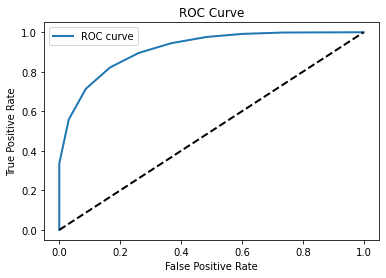

None

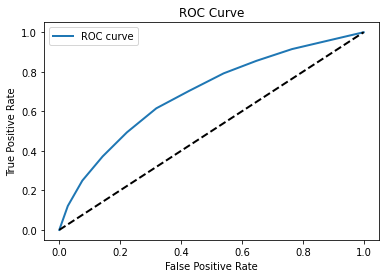

None

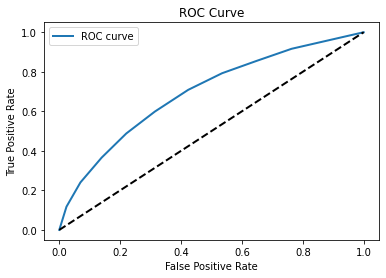

None

dev


,gmeans,bal,recall,pf,auc
0,0.647383,0.646681,0.615263,0.31882,0.692766


Training


,gmeans,bal,recall,pf,auc
0,0.81346,0.801212,0.89531,0.260908,0.914736


Test


,gmeans,bal,recall,pf,auc
0,0.640864,0.639693,0.598669,0.313967,0.693554


In [ ]:
result_knn_jm1 = runknn(data_jm1_load, neighbors=9.889893406901798, sampling=0.9140222841904627, n =9.493368765174194, leaf = 89.26557471885576)

print("dev")
display(result_knn_jm1[0])
print("Training")
display(result_knn_jm1[1])
print("Test")
display(result_knn_jm1[2])

### PC3

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'n': (1,10),
           'leaf': (10,100)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridknn,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   leaf    |     n     | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.687    |  46.91    |  6.95     |  7.474    |  0.936    |
|  2        |  0.682    |  76.63    |  3.247    |  7.97     |  0.8402   |
|  3        |  0.687    |  77.84    |  9.324    |  5.379    |  0.8614   |
|  4        |  0.6802   |  26.0     |  6.078    |  4.36     |  0.9174   |
|  5        |  0.685    |  58.1     |  4.641    |  6.282    |  0.8299   |
|  6        |  0.6605   |  19.26    |  2.634    |  4.038    |  0.9735   |
|  7        |  0.6788   |  45.67    |  8.547    |  8.952    |  0.821    |
|  8        |  0.6826   |  71.59    |  2.903    |  4.988    |  0.9326   |
|  9        |  0.6566   |  96.01    |  4.359    |  1.835    |  0.8344   |
|  10       |  0.6963   |  23.04    |  7.806    |  3.686    |  0.8105   |
|  11       |  0.6775   |  10.78    |  9.885    |  1.07     |  0.931    |
|  12       |  0.6861   |  45.17    | 

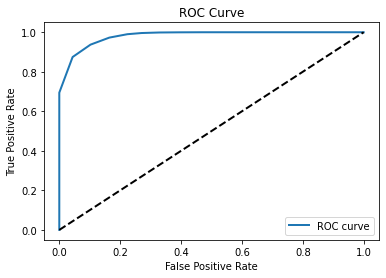

None

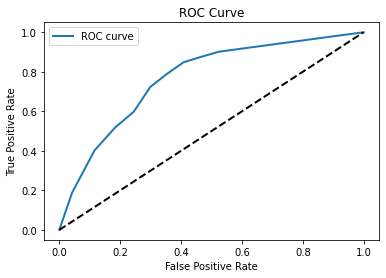

None

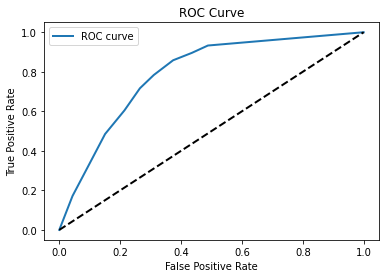

None

dev


,gmeans,bal,recall,pf,auc
0,0.712075,0.711948,0.723214,0.298893,0.766819


Training


,gmeans,bal,recall,pf,auc
0,0.876724,0.841704,0.990066,0.223643,0.980619


Test


,gmeans,bal,recall,pf,auc
0,0.725733,0.725633,0.716418,0.264831,0.790155


In [ ]:
result_knn_pc3 = runknn(data_pc3_load,fold = 7, neighbors=6.548859439581869, sampling=0.9973462514730216, n =9.187388365203727, leaf = 61.5755682577766)

print("dev")
display(result_knn_pc3[0])
print("Training")
display(result_knn_pc3[1])
print("Test")
display(result_knn_pc3[2])

### PC4

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'n': (1,10),
           'leaf': (10,100)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridknn,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   leaf    |     n     | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.7647   |  85.1     |  3.432    |  3.32     |  0.8962   |
|  2        |  0.7152   |  65.21    |  1.515    |  6.193    |  0.9258   |
|  3        |  0.7777   |  17.04    |  4.817    |  3.548    |  0.8119   |
|  4        |  0.7252   |  68.33    |  1.035    |  2.29     |  0.9738   |
|  5        |  0.7539   |  26.71    |  3.875    |  2.033    |  0.9589   |
|  6        |  0.7547   |  79.77    |  2.911    |  4.088    |  0.9454   |
|  7        |  0.7927   |  41.97    |  8.315    |  4.21     |  0.9425   |
|  8        |  0.806    |  95.02    |  4.896    |  8.84     |  0.9517   |
|  9        |  0.7883   |  69.89    |  4.859    |  3.028    |  0.8226   |
|  10       |  0.7699   |  89.71    |  9.551    |  1.138    |  0.8605   |
|  11       |  0.7713   |  10.0     |  10.0     |  1.0      |  0.8      |
|  12       |  0.7905   |  20.95    | 

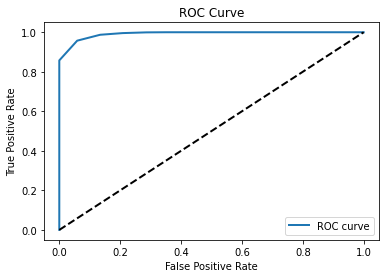

None

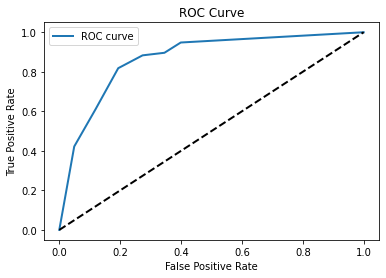

None

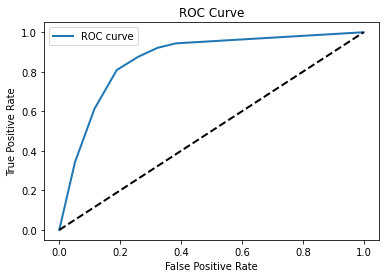

None

dev


,gmeans,bal,recall,pf,auc
0,0.812251,0.81218,0.818182,0.193636,0.866443


Training


,gmeans,bal,recall,pf,auc
0,0.924546,0.90471,0.987226,0.134154,0.991621


Test


,gmeans,bal,recall,pf,auc
0,0.810036,0.810034,0.808989,0.188915,0.863686


In [ ]:
result_knn_pc4 = runknn(data_pc4_load,fold = 7, neighbors=9.955727182293785, sampling=0.9168557678394071, n =6.36634050996635, leaf = 14.50245127363096)

print("dev")
display(result_knn_pc4[0])
print("Training")
display(result_knn_pc4[1])
print("Test")
display(result_knn_pc4[2])

### PC1

In [ ]:
from bayes_opt import BayesianOptimization
repro()
pbounds = {'sampling': (0.8,1),
           'neighbors': (1,10),
           'n': (1,10),
           'leaf': (10,100)
          }
# model = KerasClassifier(build_fn=gridNeuralNet, 
#                         data = data_pc4_load,
#                         input = len(data_pc4_load[0].columns)
#                         )
optimizer = BayesianOptimization(
    f=gridknn,
    pbounds=pbounds
)

optimizer.maximize(init_points=10, n_iter=40)
print(optimizer.max)

|   iter    |  target   |   leaf    |     n     | neighbors | sampling  |
-------------------------------------------------------------------------
|  1        |  0.6485   |  84.5     |  2.264    |  5.726    |  0.8071   |
|  2        |  0.7817   |  36.93    |  5.07     |  4.058    |  0.87     |
|  3        |  0.7386   |  17.9     |  3.912    |  6.207    |  0.9831   |
|  4        |  0.6565   |  41.7     |  1.641    |  7.228    |  0.8804   |
|  5        |  0.7768   |  30.82    |  4.94     |  7.726    |  0.9135   |
|  6        |  0.6612   |  55.2     |  2.302    |  3.781    |  0.8728   |
|  7        |  0.7386   |  96.03    |  3.485    |  8.761    |  0.8166   |
|  8        |  0.7798   |  11.24    |  5.667    |  1.549    |  0.9169   |
|  9        |  0.7528   |  40.16    |  2.976    |  2.381    |  0.8139   |
|  10       |  0.7867   |  12.07    |  8.719    |  2.262    |  0.8676   |
|  11       |  0.7863   |  100.0    |  10.0     |  1.0      |  1.0      |
|  12       |  0.6535   |  100.0    | 

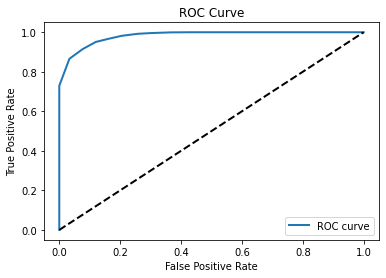

None

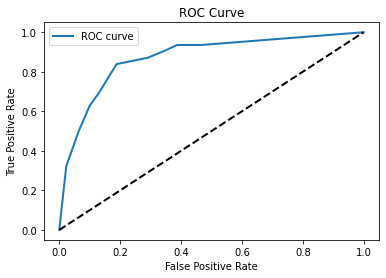

None

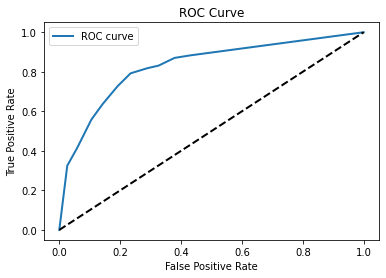

None

dev


,gmeans,bal,recall,pf,auc
0,0.825156,0.824749,0.83871,0.188179,0.87053


Training


,gmeans,bal,recall,pf,auc
0,0.899916,0.882653,0.96719,0.162678,0.981644


Test


,gmeans,bal,recall,pf,auc
0,0.766729,0.764289,0.727273,0.191675,0.828064


In [ ]:
result_knn_pc1 = runknn(data_pc1_load,fold = 5, neighbors=9.977717562417903, sampling=0.8693136487603738, n =9.95642557373385, leaf = 93.5250566591164)

print("dev")
display(result_knn_pc1[0])
print("Training")
display(result_knn_pc1[1])
print("Test")
display(result_knn_pc1[2])